# Explainability

In this notebook we will see the feature importance of the models. 

In [1]:
import os
import joblib
import pandas as pd
import warnings

from CogniPredictAD.visualization import ModelExplainer

pd.set_option('display.max_rows', 116)
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_info_columns', 40) 

warnings.simplefilter(action='ignore', category=FutureWarning)

train = pd.read_csv("../data/train.csv")

# Target column
y_train = train['DX']

# All other columns as features
X_train = train.drop(columns=['DX'])

display(train)

DX  AGE  PTGENDER  PTEDUCAT  APOE4  MMSE  CDRSB  ADAS13  LDELTOTAL  \
0       AD   80         1        14      0    21    6.5      42          0   
1     LMCI   82         1        20      0    24    1.5      20          2   
2     LMCI   71         1        19      0    26    1.0       8          2   
3       CN   75         0        20      0    30    0.0       6         19   
4       CN   81         0        19      0    29    0.0       8         11   
...    ...  ...       ...       ...    ...   ...    ...     ...        ...   
1929  LMCI   64         0        14      2    27    2.0      22          0   
1930  LMCI   82         1        18      0    28    1.5      23          5   
1931  LMCI   76         1        12      0    25    1.0      16          3   
1932  LMCI   74         1        19      1    26    2.0      27          3   
1933  EMCI   72         1        14      1    26    0.5      15          7   

      FAQ  MOCA  TRABSCOR  RAVLT_immediate  RAVLT_learning  \
0      19    13       300               15               1   
1       4    20       155               29               0   
2       2    25       106               51               2   
3       0    26        58               61               7   
4       0    29        54               54               7   
...   ...   ...       ...              ...             ...   
1929    9    22        62               31               1   
1930    1    25        79               33               1   
1931    1    22       300               27               2   
1932    8    21       102               32               1   
1933    1    24       116               25               0   

      RAVLT_perc_forgetting  mPACCdigit  EcogPtMem  EcogPtLang  EcogPtVisspat  \
0                  100.0000   -20.06920    3.14286    3.000000       3.000000   
1                   83.3333   -10.20060    2.10000    1.780554       1.274284   
2                  -18.1818    -5.90200    2.75000    2.555560       2.285710   
3                   20.0000     3.19941    1.75000    1.333330       1.000000   
4                   28.5714    -1.16303    1.87500    1.555560       1.000000   
...                     ...         ...        ...         ...            ...   
1929               100.0000   -10.37820    2.97500    1.930556       1.585714   
1930                42.8571    -9.18102    2.12500    1.125000       1.166670   
1931                16.6667    -9.94141    1.60000    1.533332       1.219048   
1932               100.0000   -13.05080    1.87500    1.333330       1.000000   
1933                25.0000    -9.22386    2.12500    1.666670       1.000000   

      EcogPtPlan  EcogPtOrgan  EcogPtDivatt  EcogSPMem  EcogSPLang  \
0       3.200000     2.500000          2.75   4.000000    3.444440   
1       1.373334     1.699998          1.65   2.950000    2.530556   
2       3.200000     3.833330          3.50   1.510714    1.266666   
3       1.000000     1.166670          1.00   1.000000    1.000000   
4       1.000000     1.333330          1.75   1.375000    1.111110   
...          ...          ...           ...        ...         ...   
1929    1.400000     1.416668          1.95   3.025000    1.955554   
1930    2.000000     2.500000          2.00   2.625000    1.625000   
1931    1.040000     1.133334          1.45   2.100000    1.322222   
1932    1.200000     1.333330          1.00   3.125000    2.875000   
1933    1.000000     1.166670          2.00   1.750000    1.714290   

      EcogSPVisspat  EcogSPPlan  EcogSPOrgan  EcogSPDivatt       FDG  \
0          2.666670    3.000000     3.666670          3.75  1.042620   
1          2.014286    1.756666     2.316666          2.75  1.080580   
2          1.438096    1.760000     1.680000          1.85  1.414550   
3          1.000000    1.000000     1.000000          1.00  1.118820   
4          1.000000    1.200000     1.166670          1.75  1.270141   
...             ...         ...          ...           ...       ...   
1929    

Loaded model: Adaptive_Boosting
Loaded model: Adaptive_Boosting_Sampled
Loaded model: Decision_Tree
Loaded model: Decision_Tree_Sampled
Loaded model: Extra_Trees
Loaded model: Extra_Trees_Sampled
Loaded model: Multinomial_Logistic_Regression
Loaded model: Multinomial_Logistic_Regression_Sampled
Loaded model: Random_Forest
Loaded model: Random_Forest_Sampled


PermutationExplainer explainer: 1935it [17:15,  1.86it/s]                          


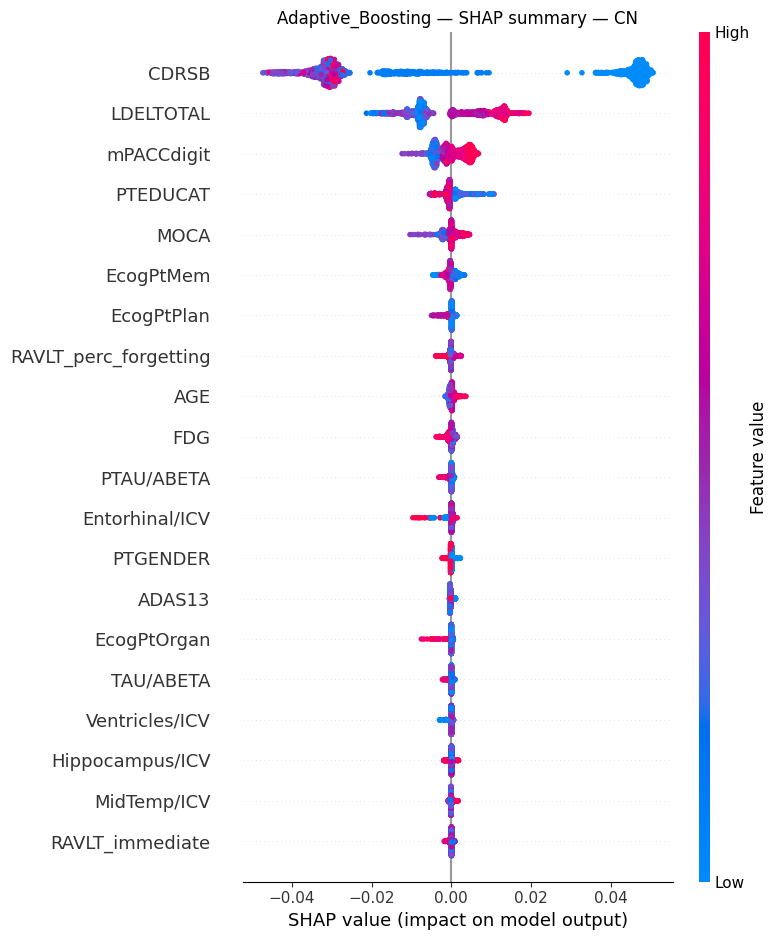

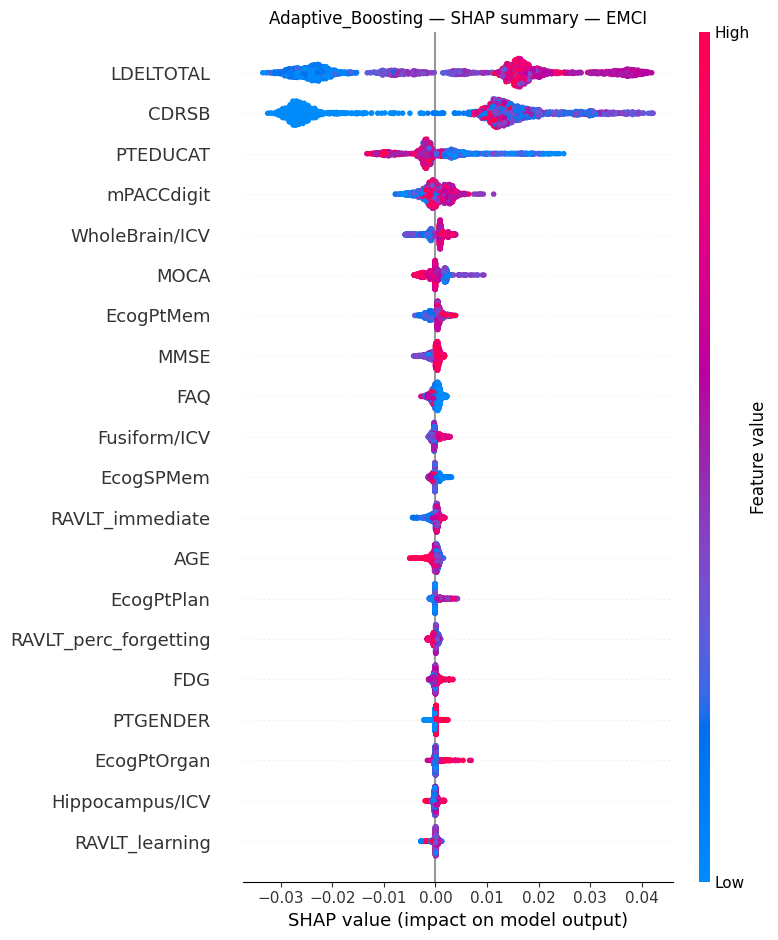

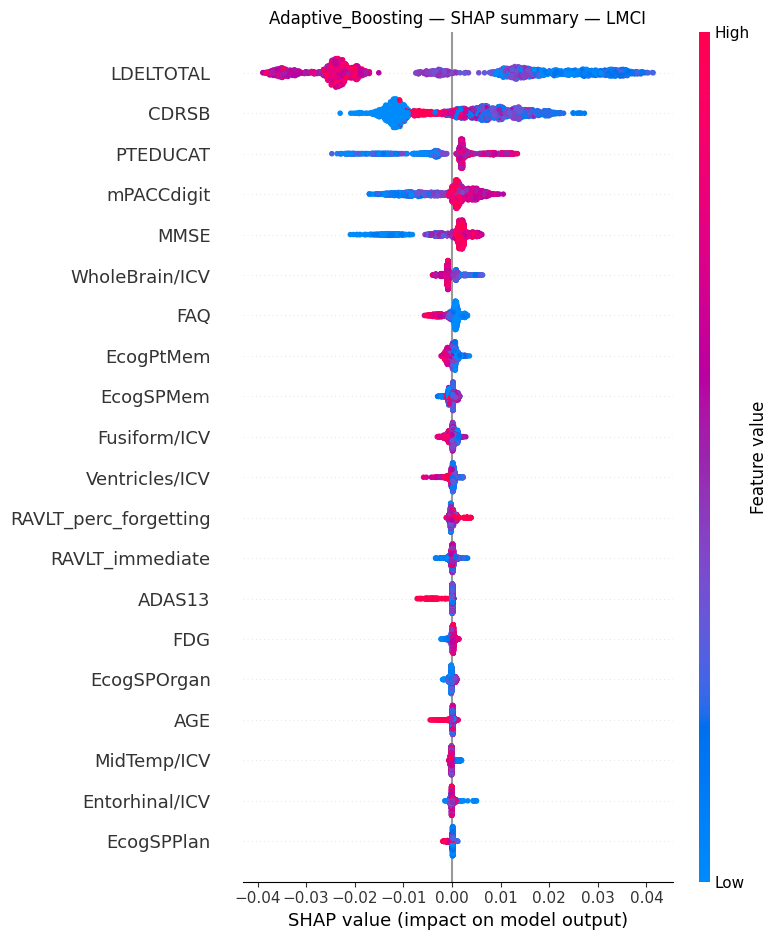

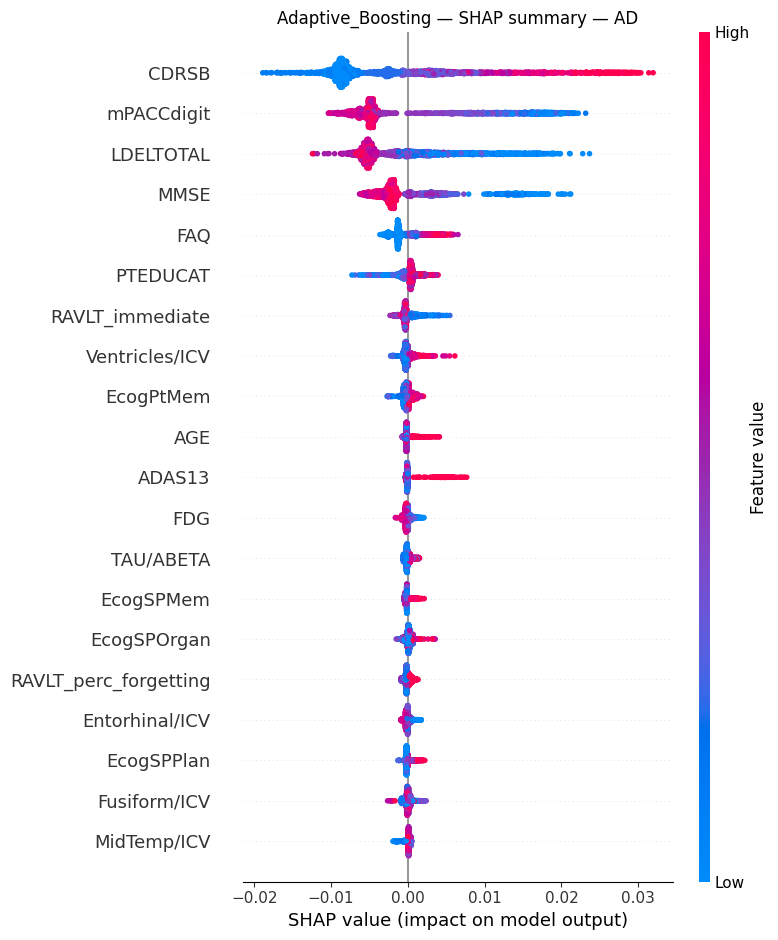

PermutationExplainer explainer: 1935it [17:20,  1.84it/s]                          


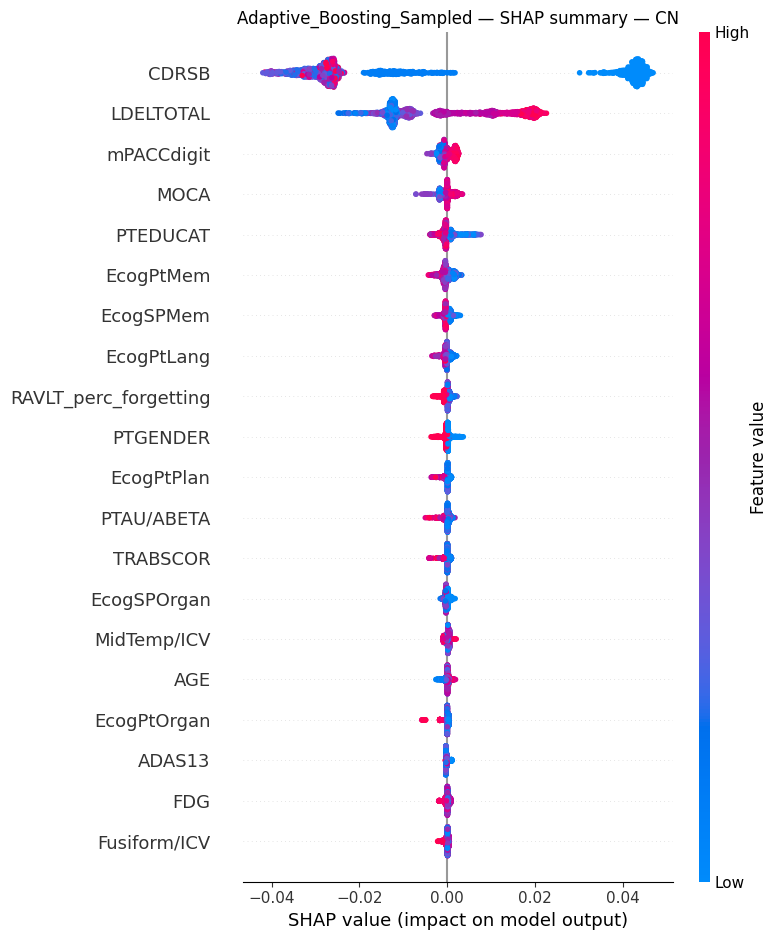

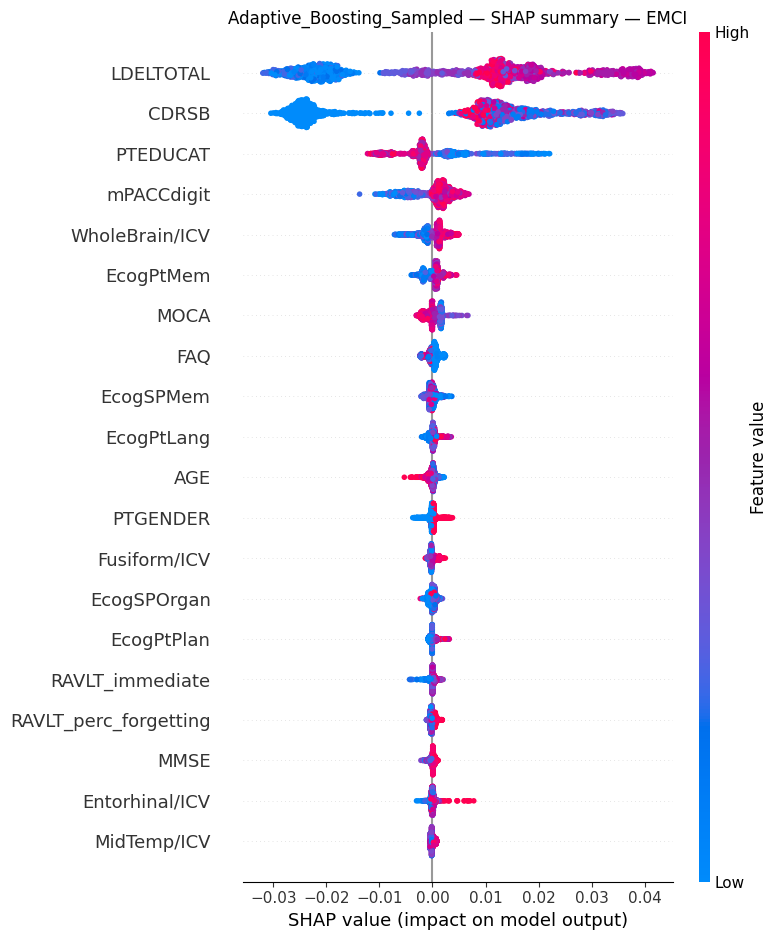

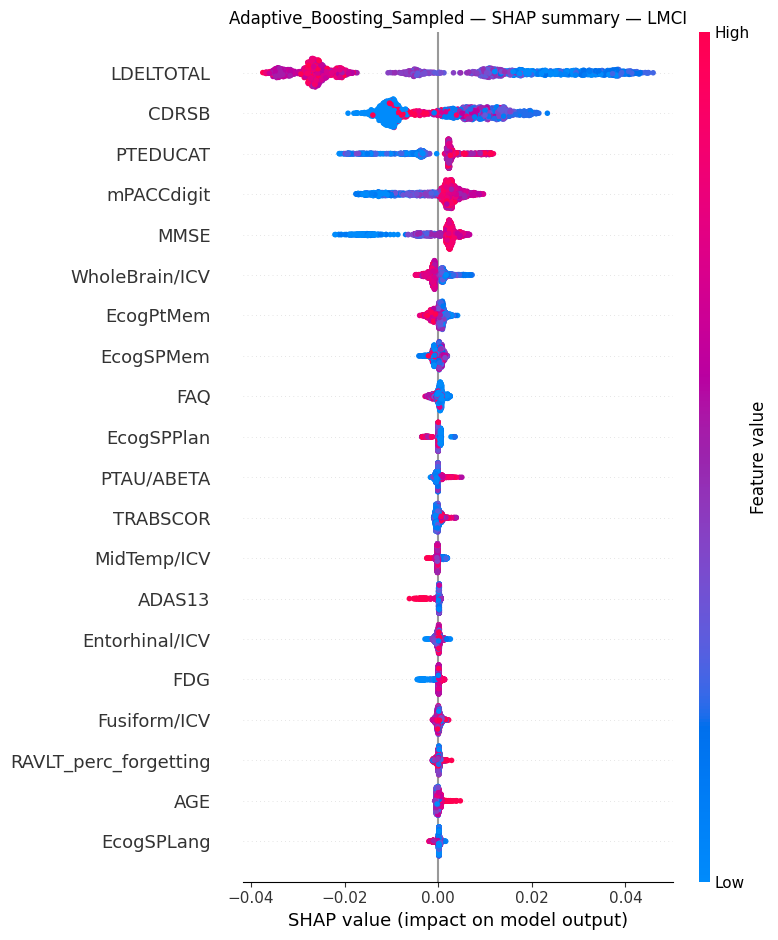

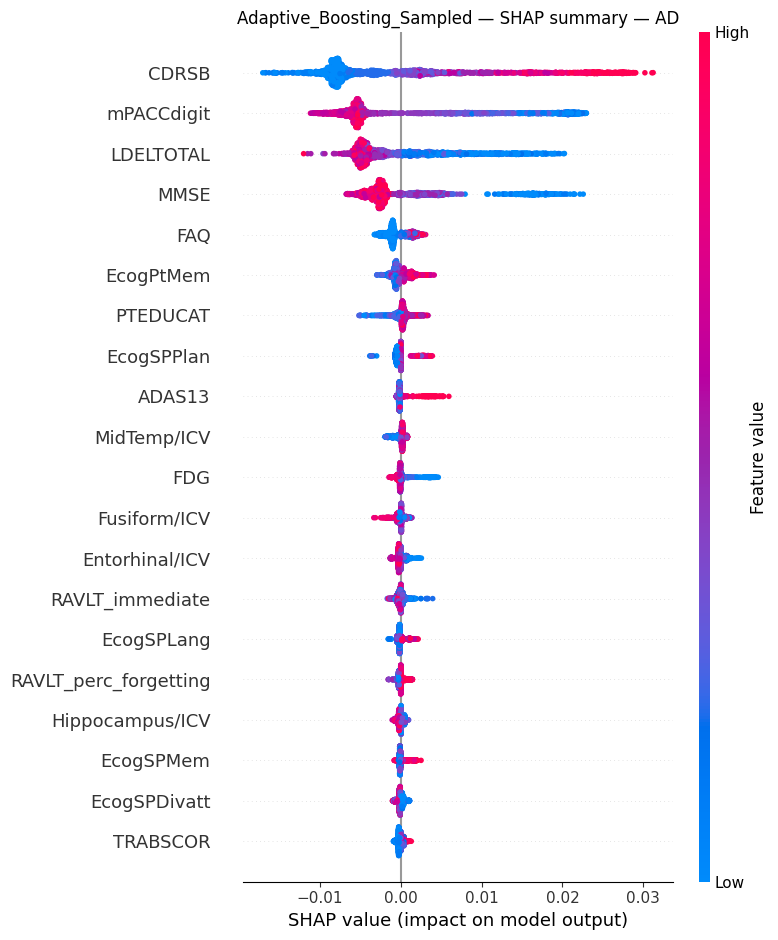

PermutationExplainer explainer: 1935it [00:59, 27.41it/s]                          


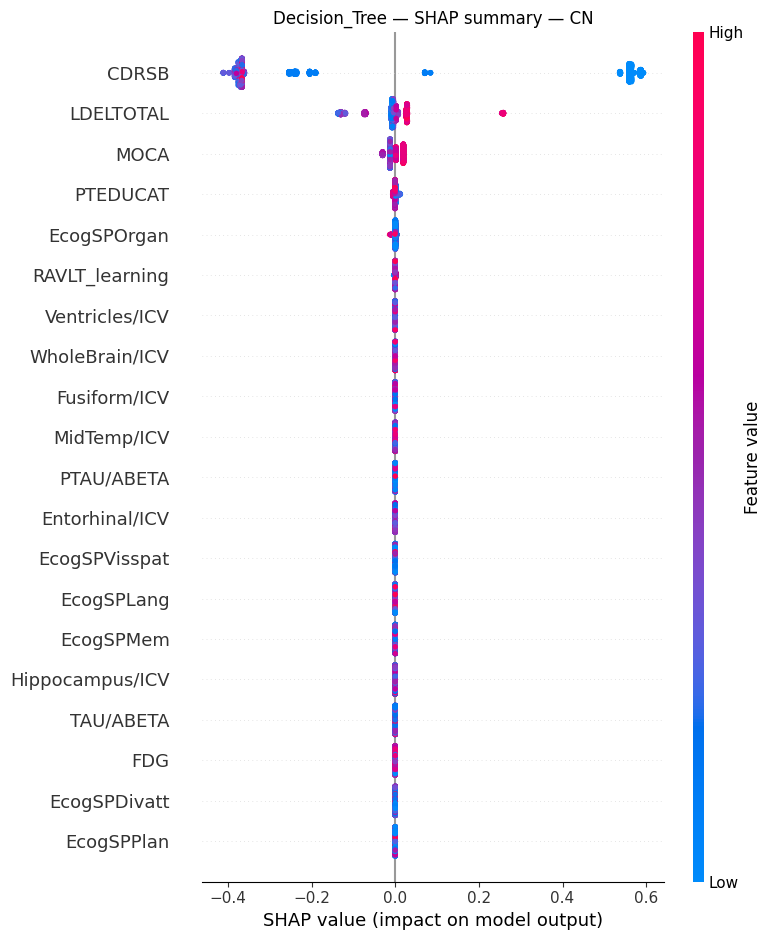

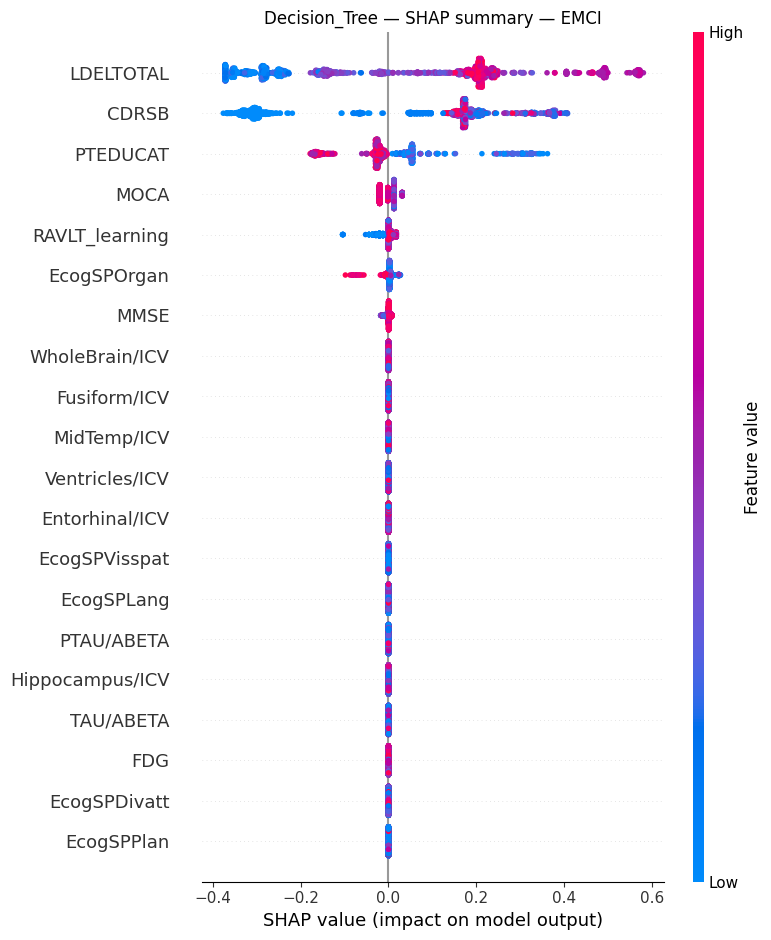

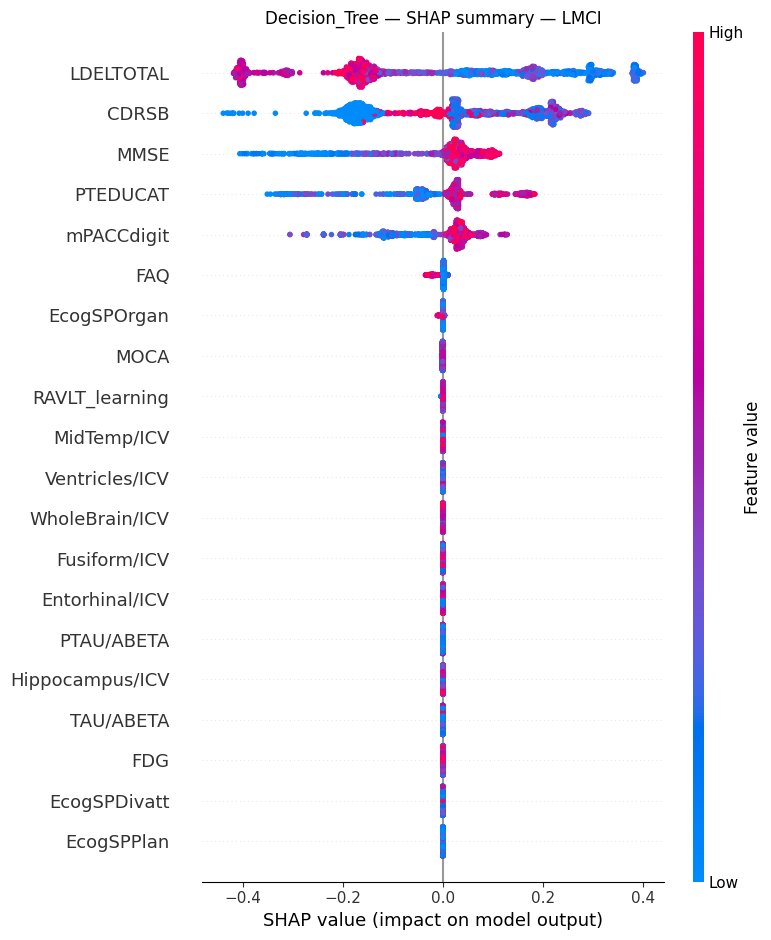

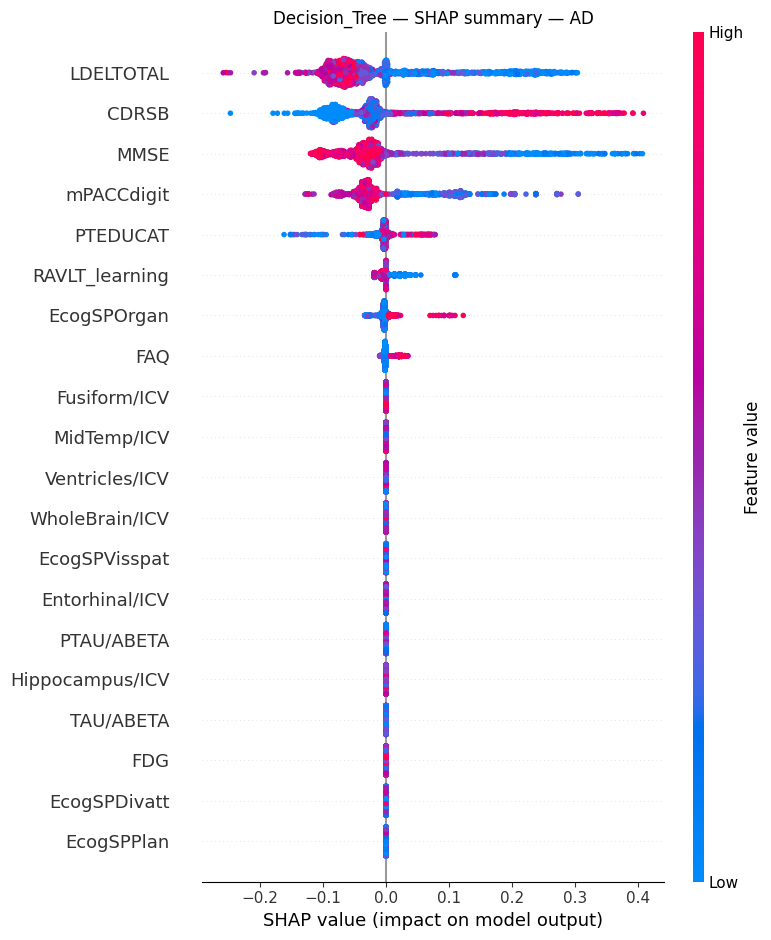

PermutationExplainer explainer: 1935it [01:00, 27.53it/s]                          


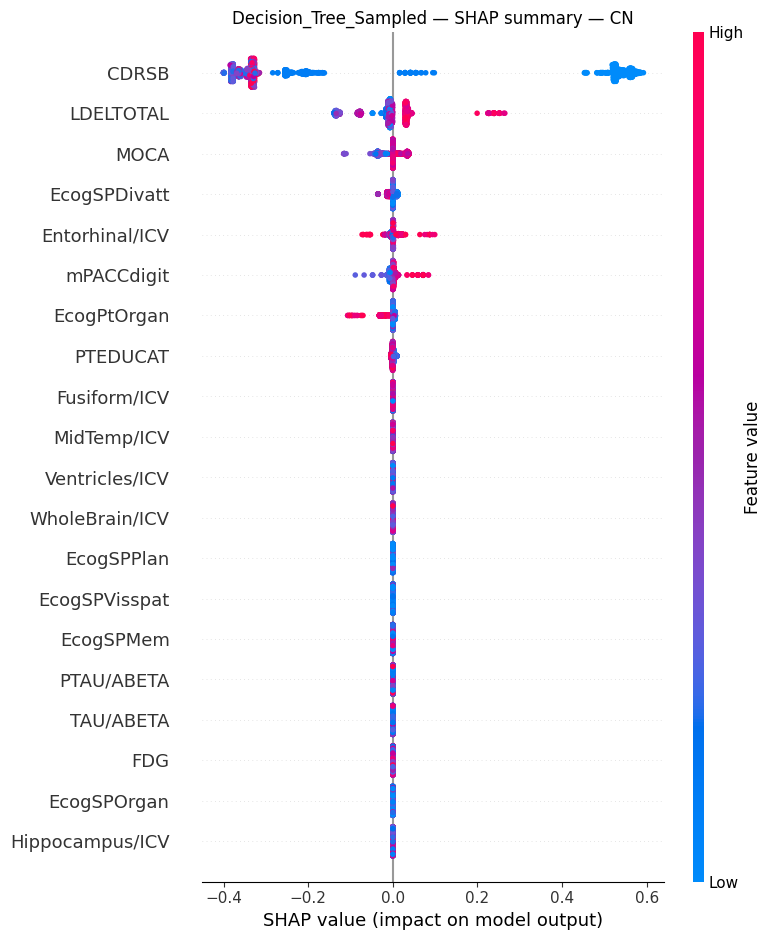

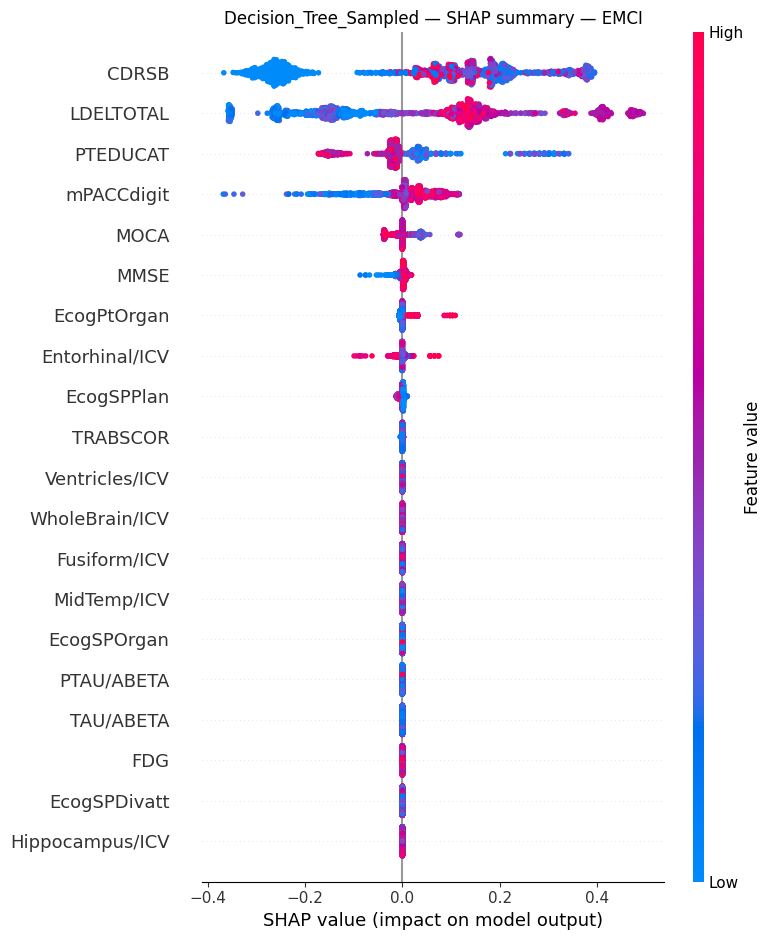

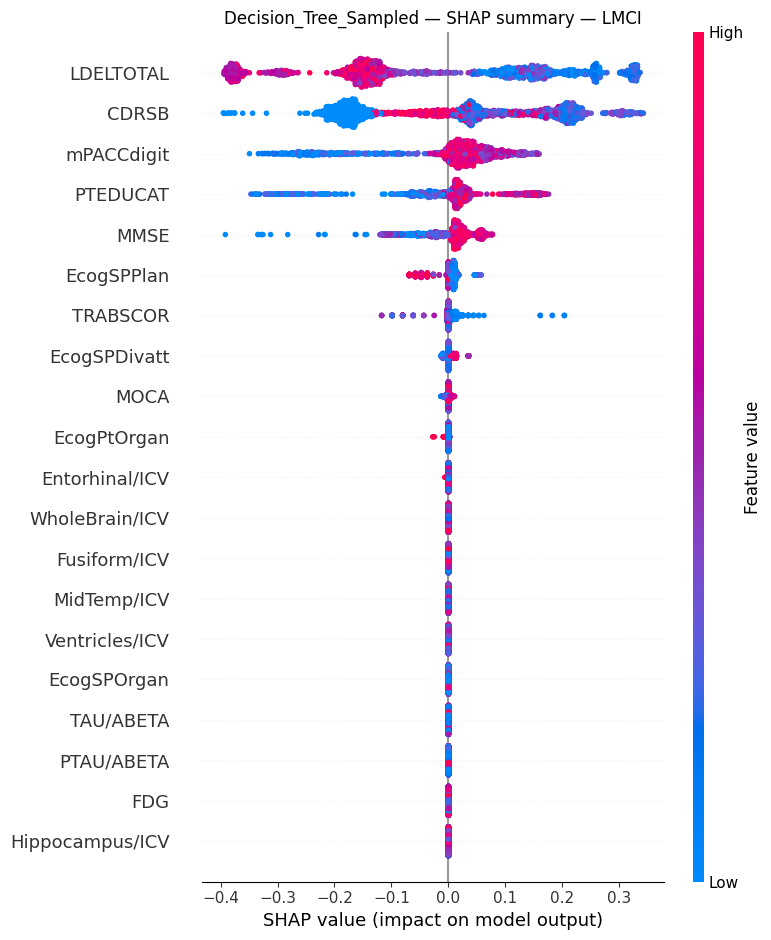

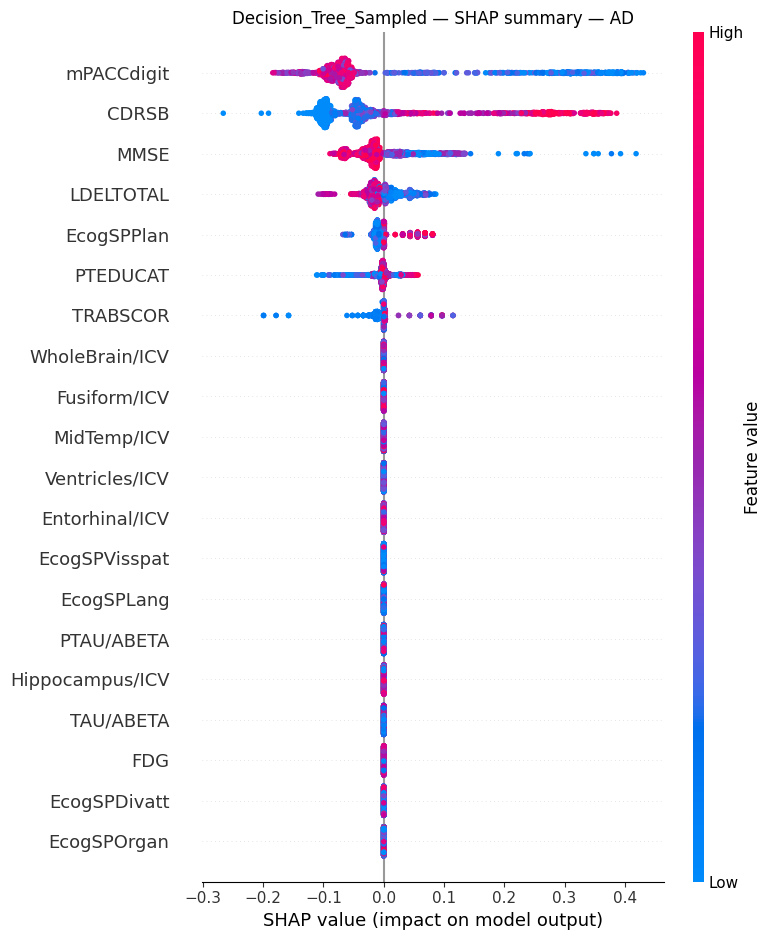

PermutationExplainer explainer: 1935it [09:31,  3.33it/s]                          


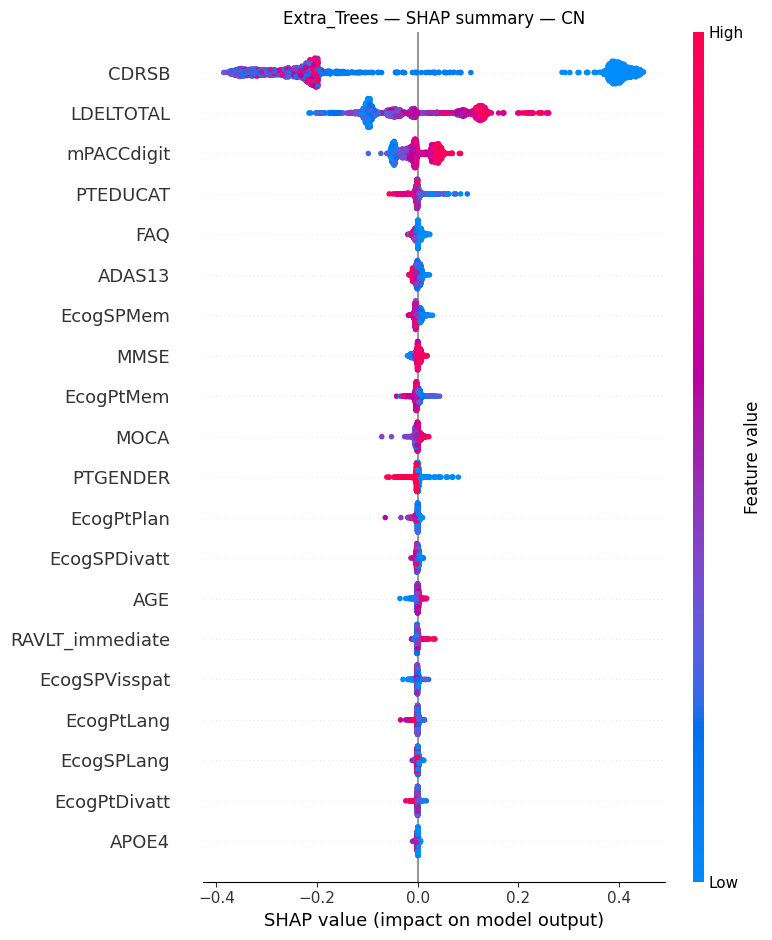

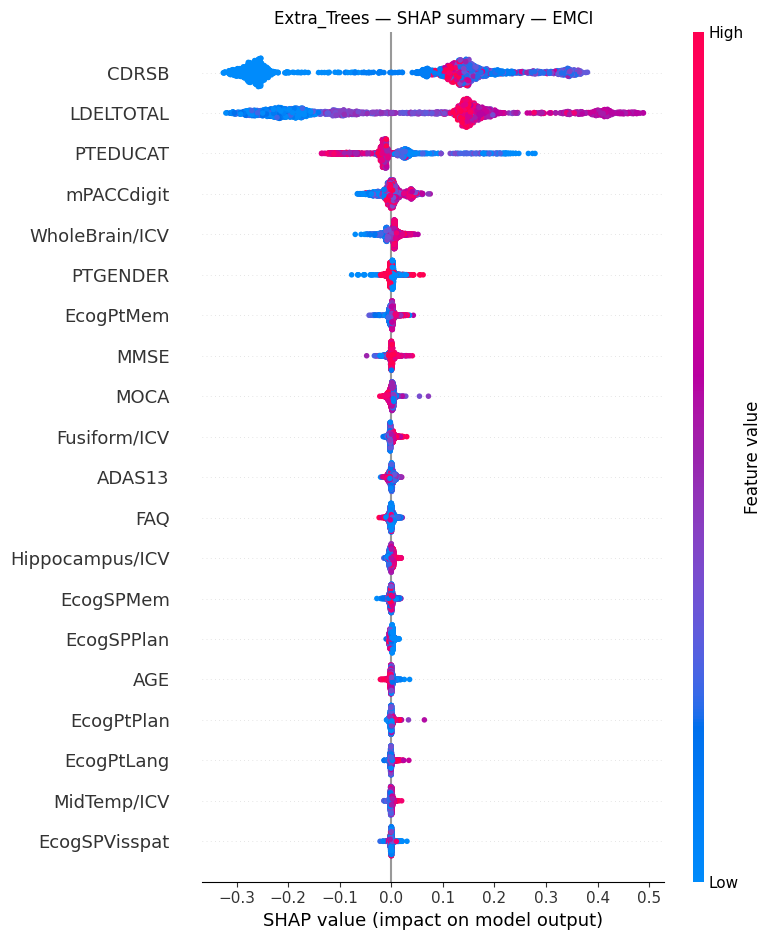

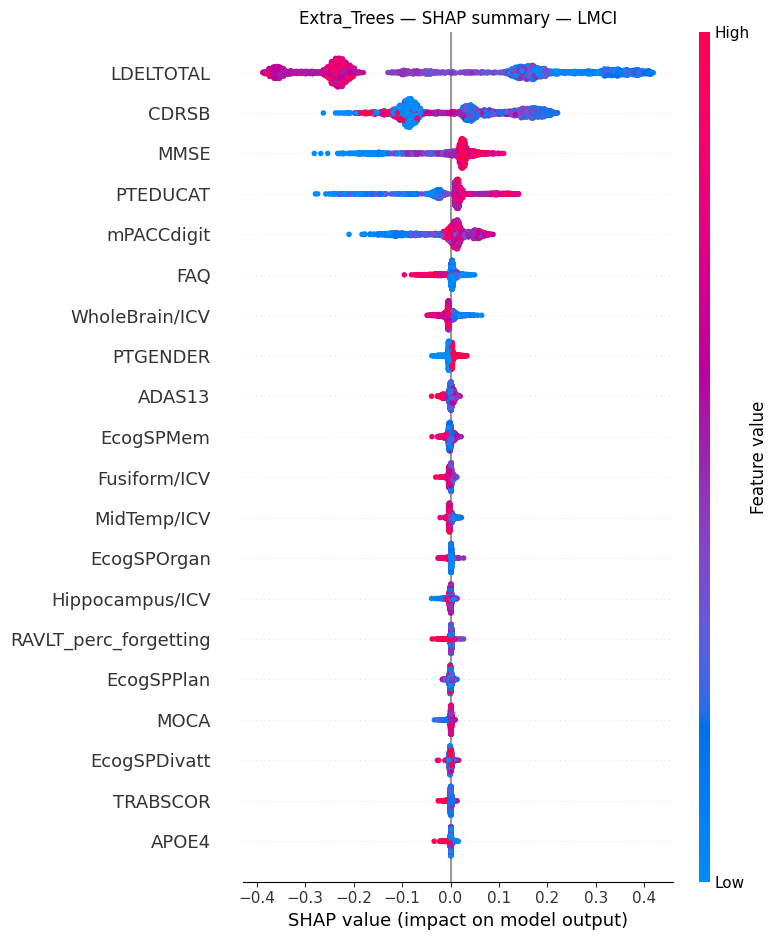

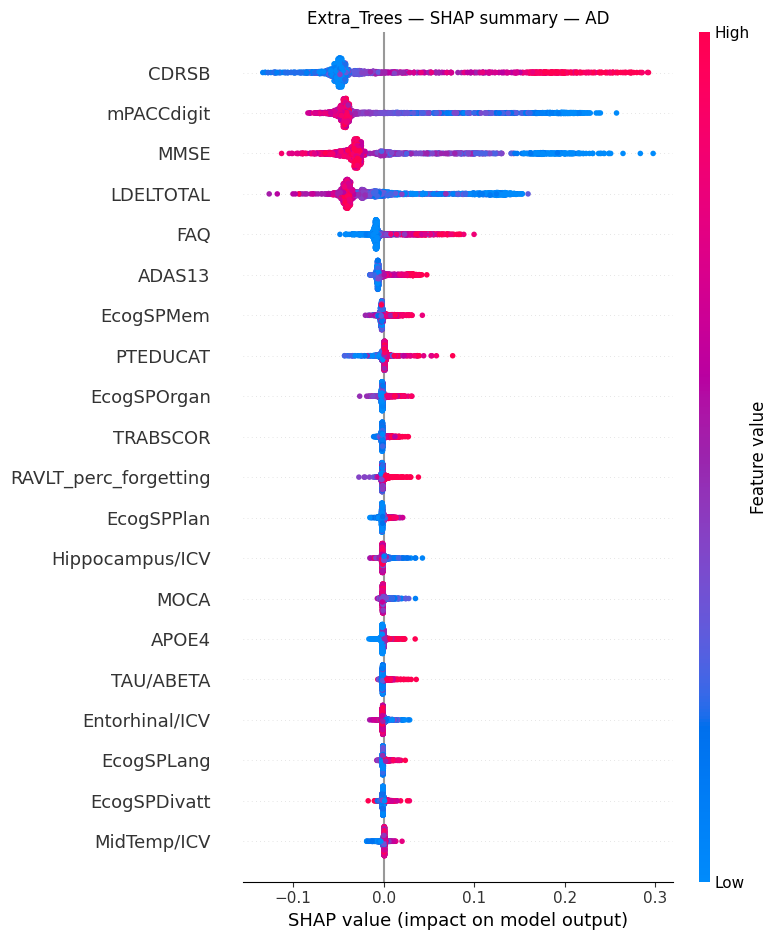

PermutationExplainer explainer: 1935it [10:48,  2.94it/s]                          


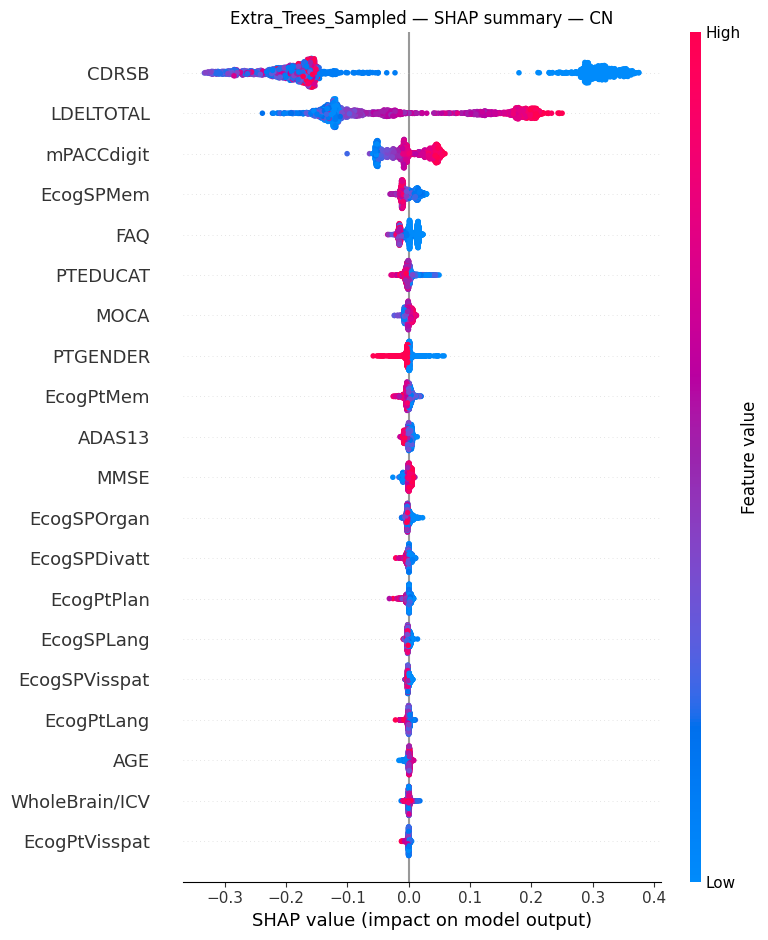

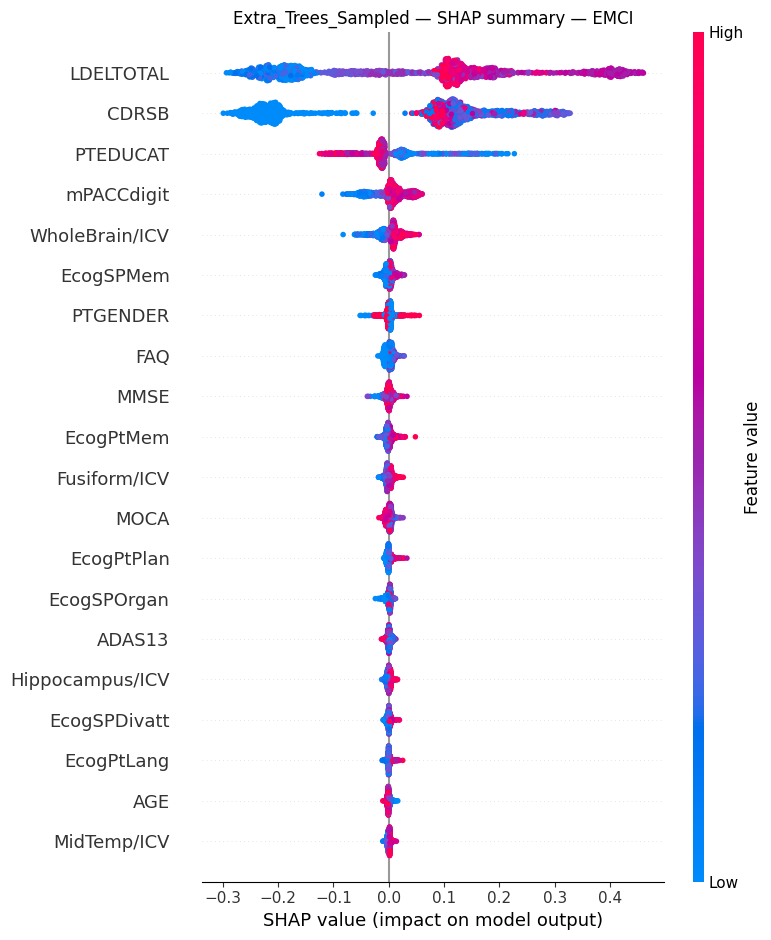

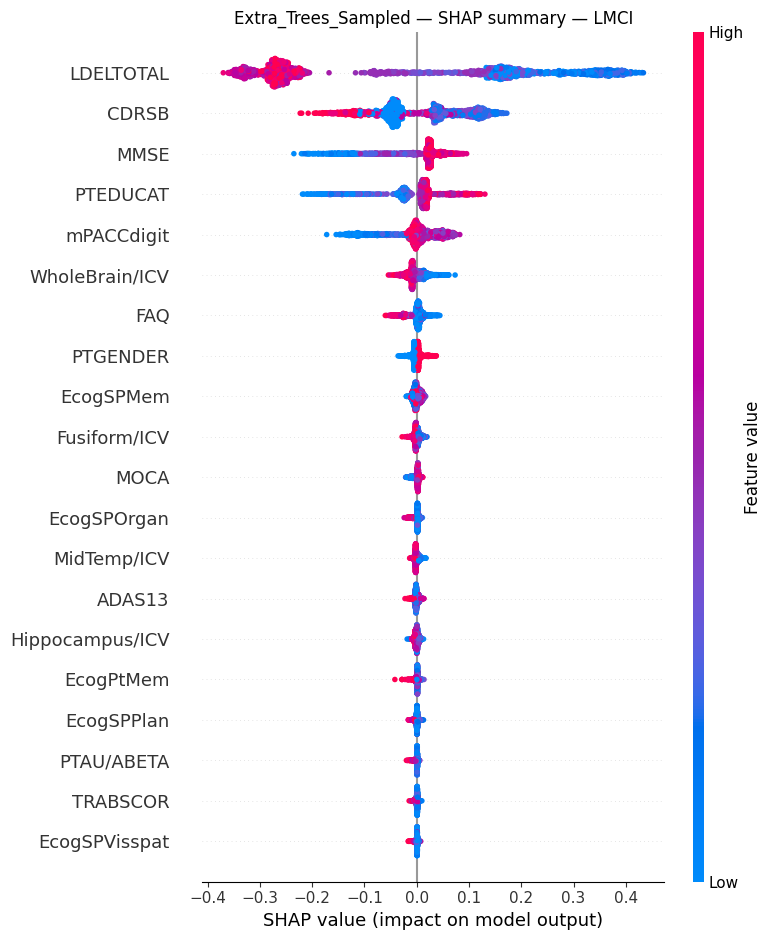

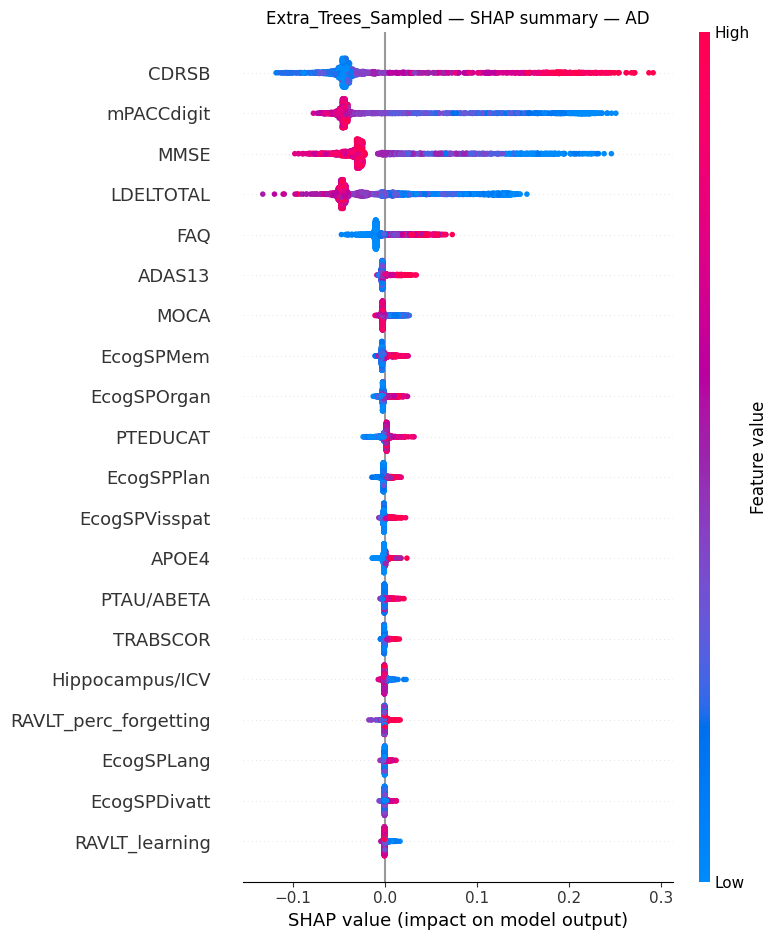

PermutationExplainer explainer: 1935it [01:33, 18.30it/s]                          


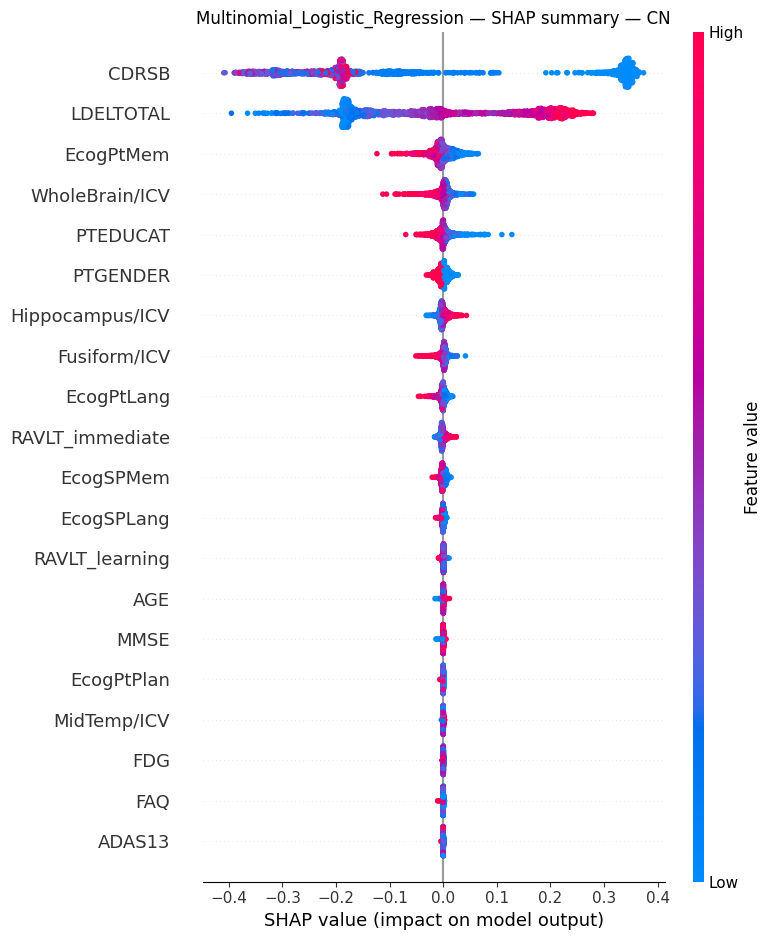

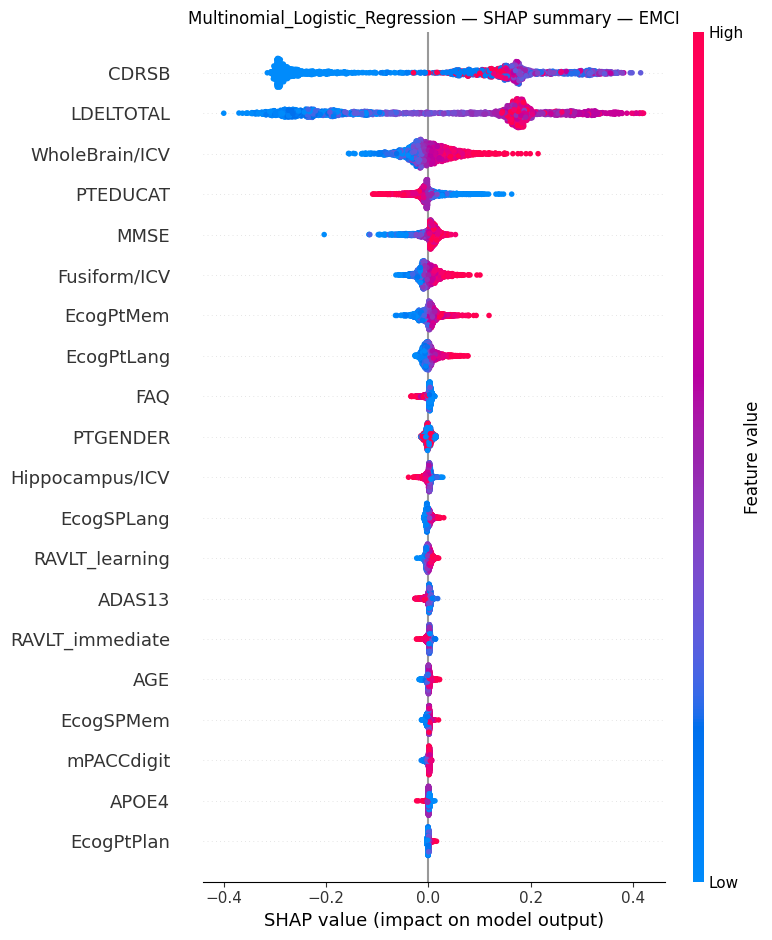

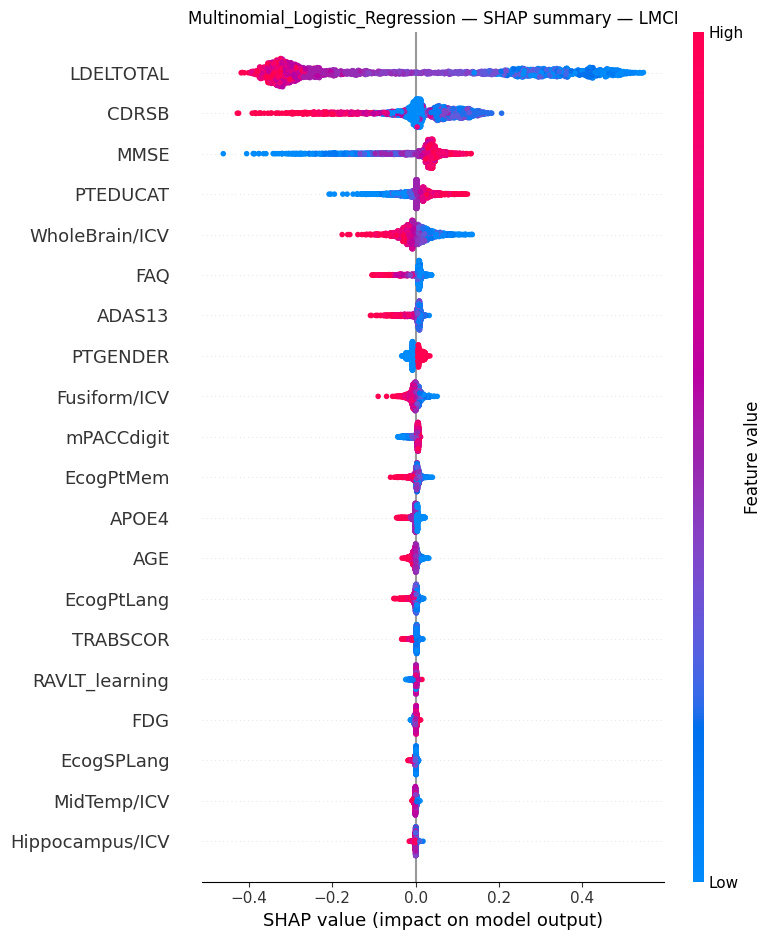

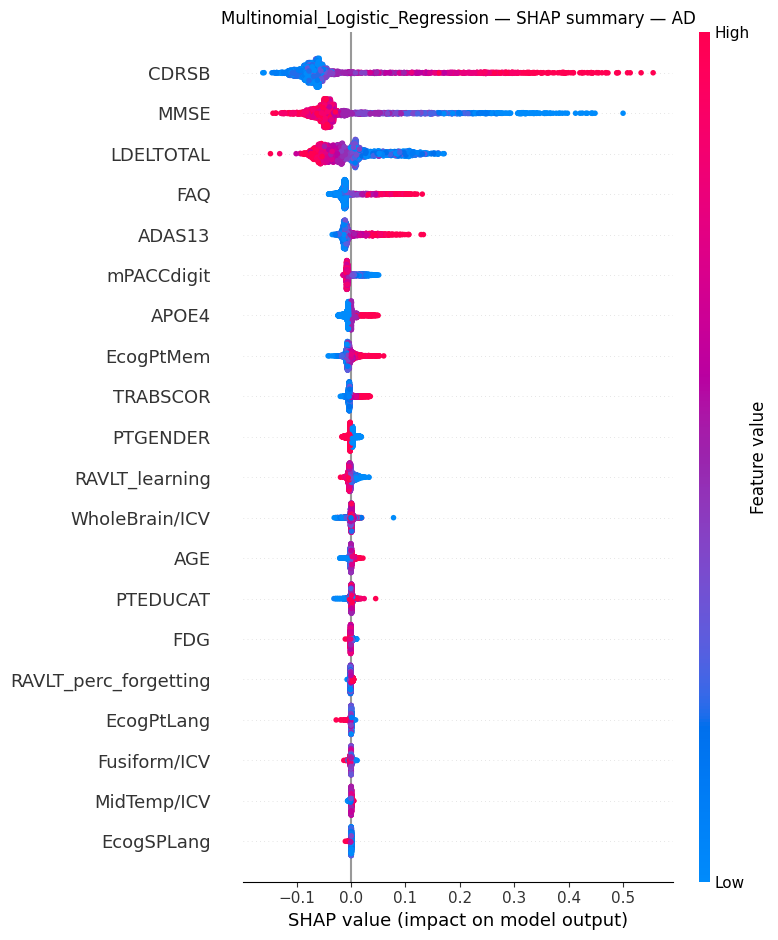

PermutationExplainer explainer: 1935it [01:34, 18.52it/s]                          


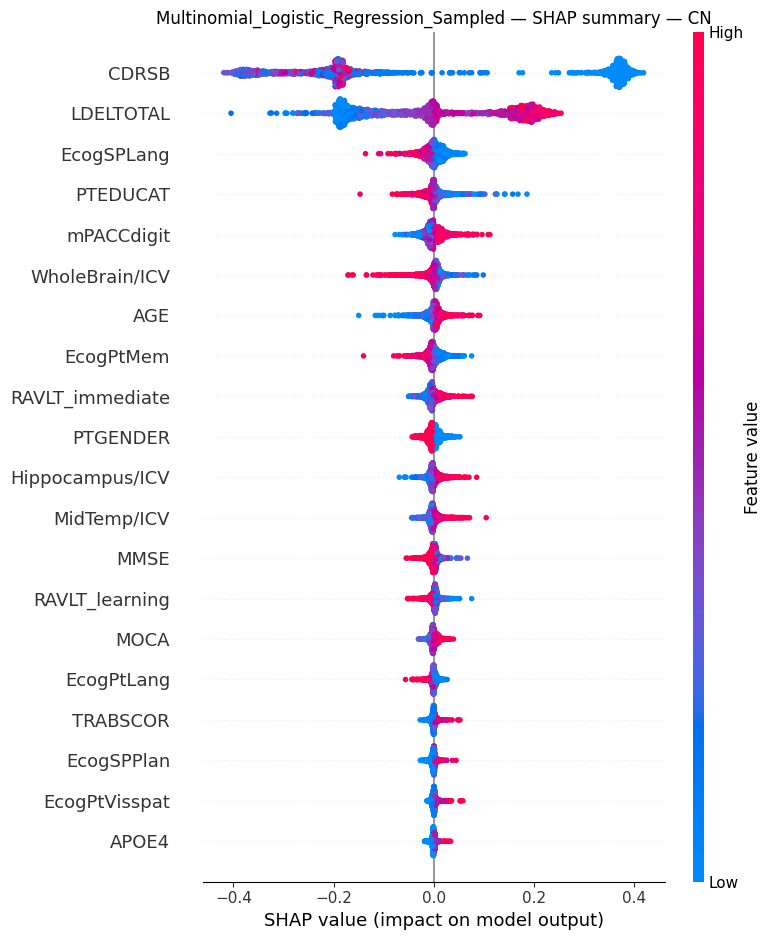

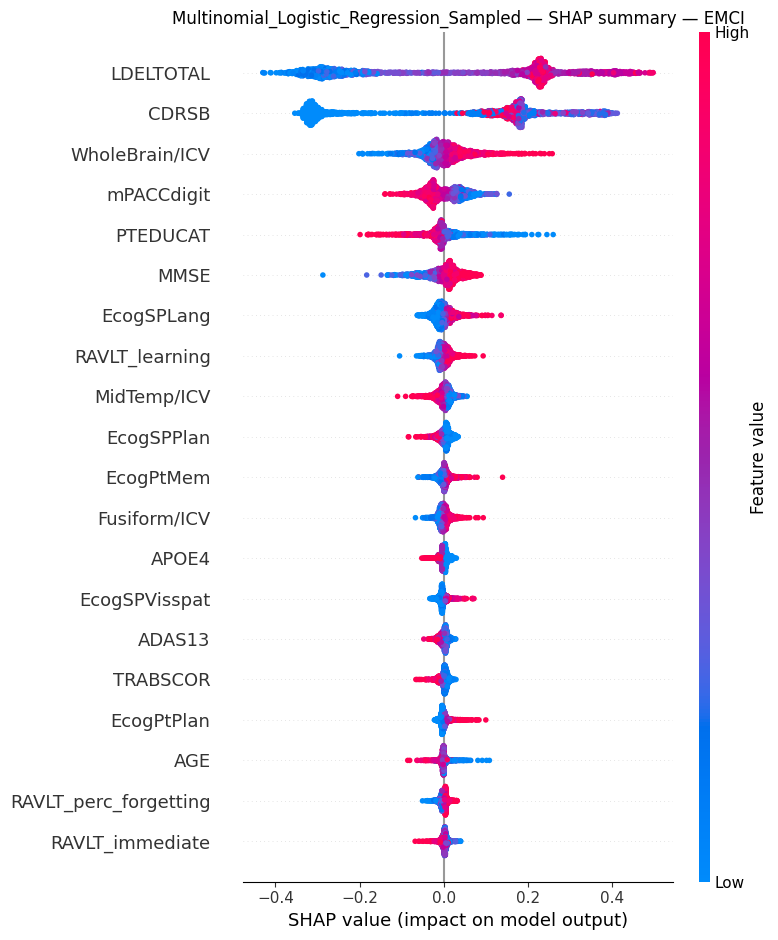

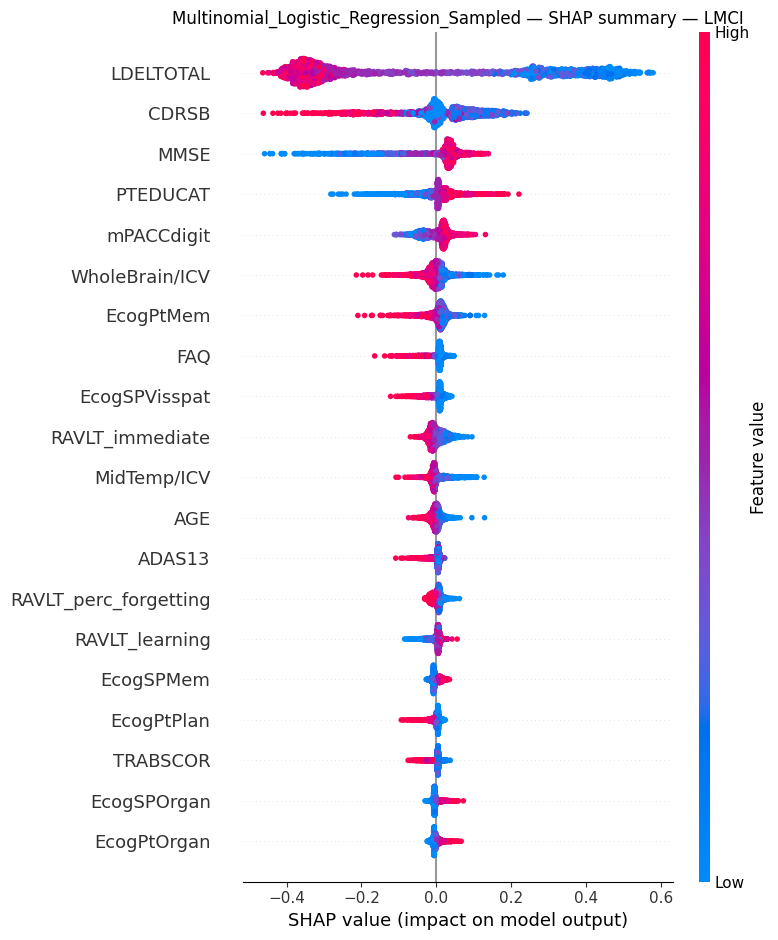

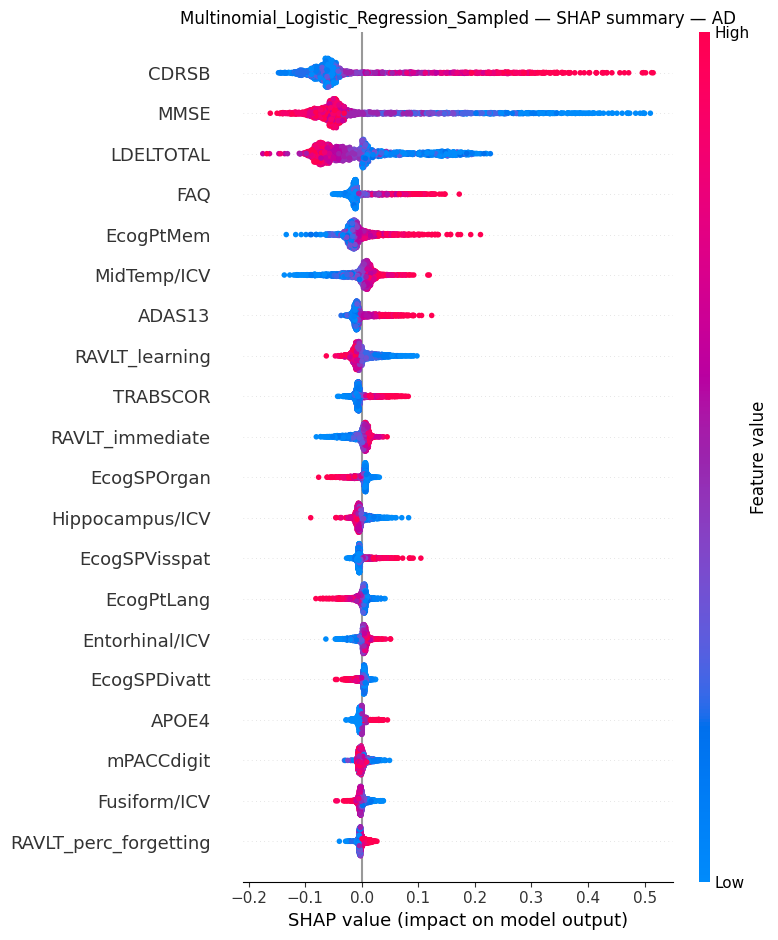

PermutationExplainer explainer: 1935it [12:51,  2.47it/s]                          


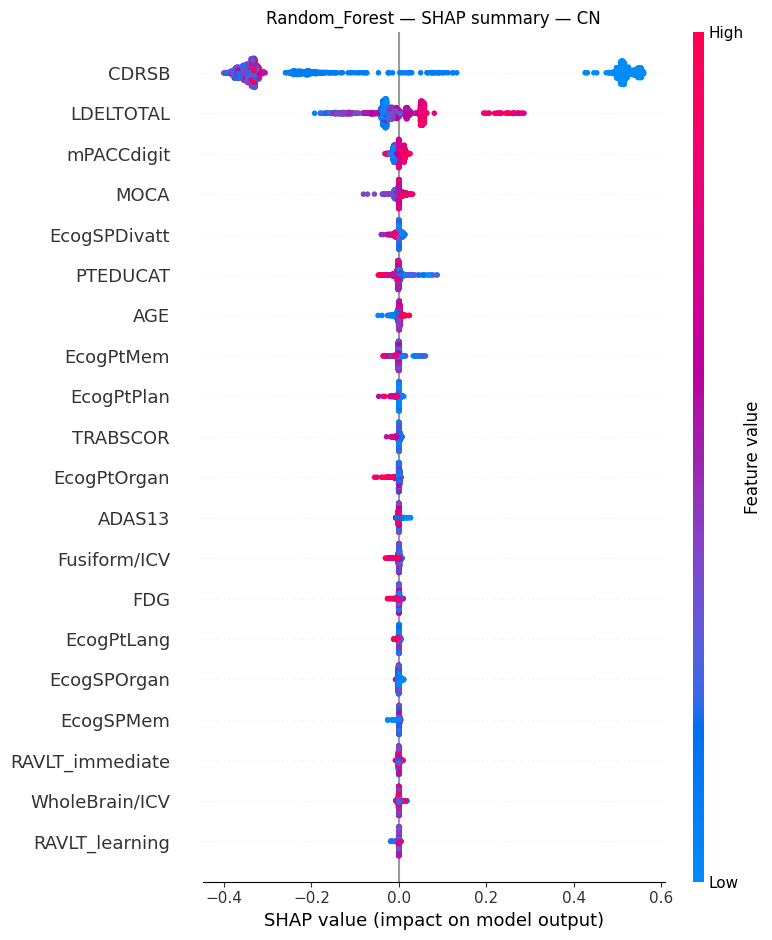

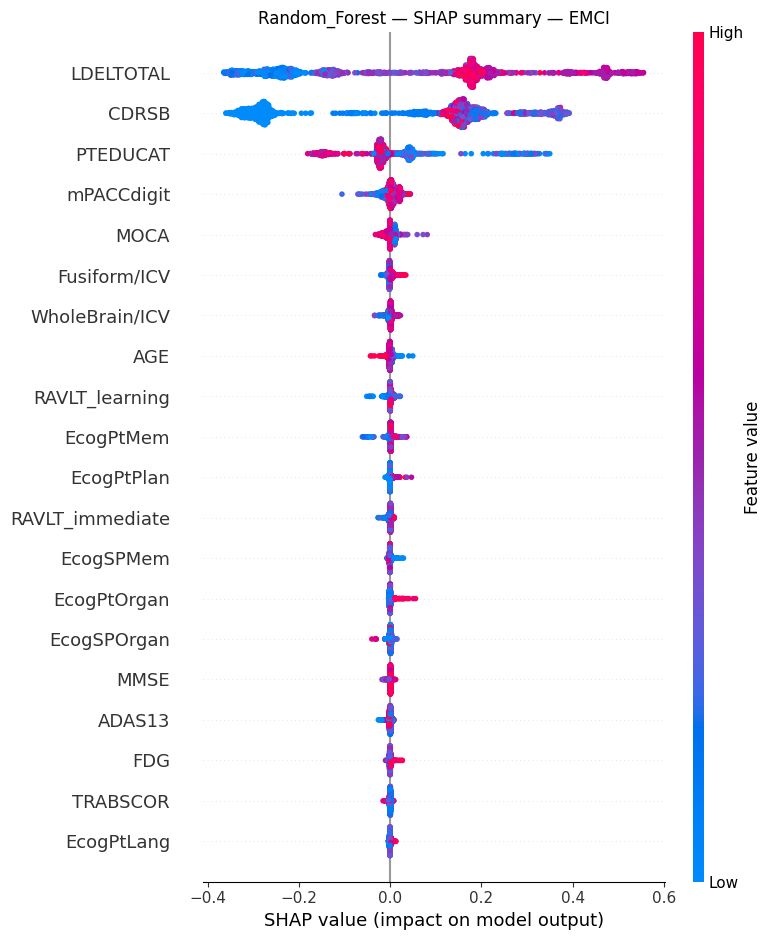

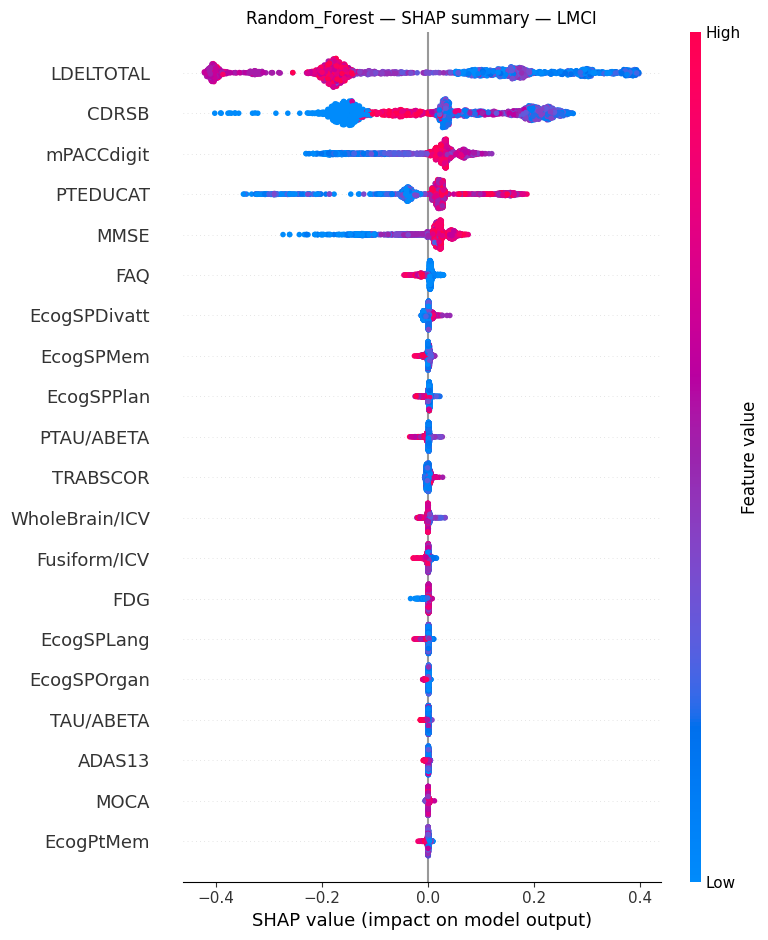

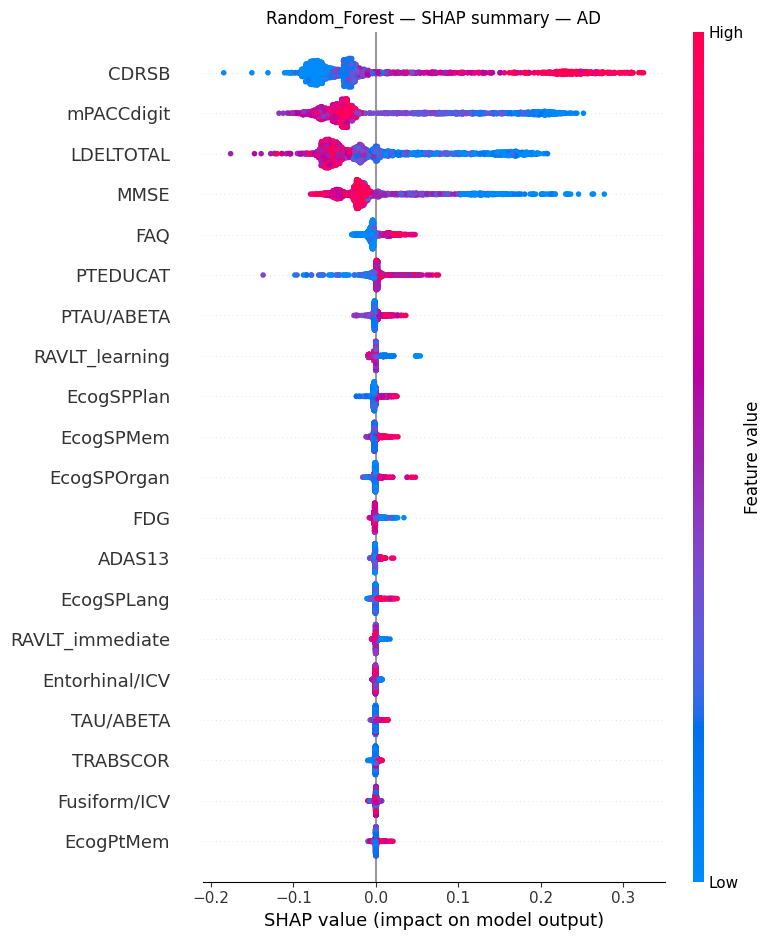

PermutationExplainer explainer: 1935it [07:37,  4.14it/s]                          


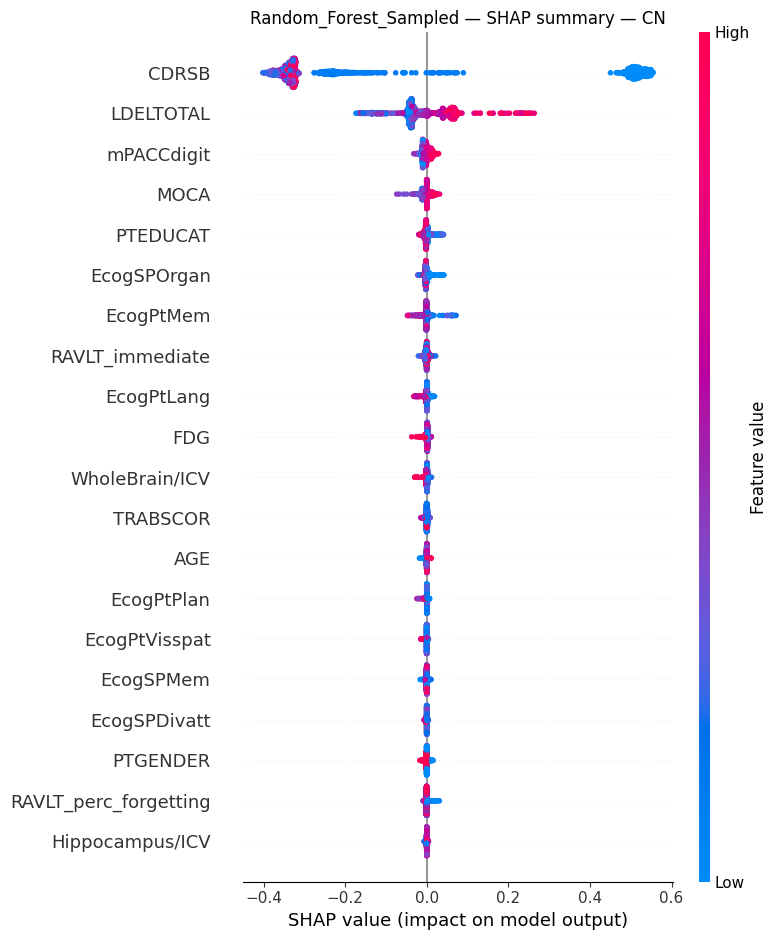

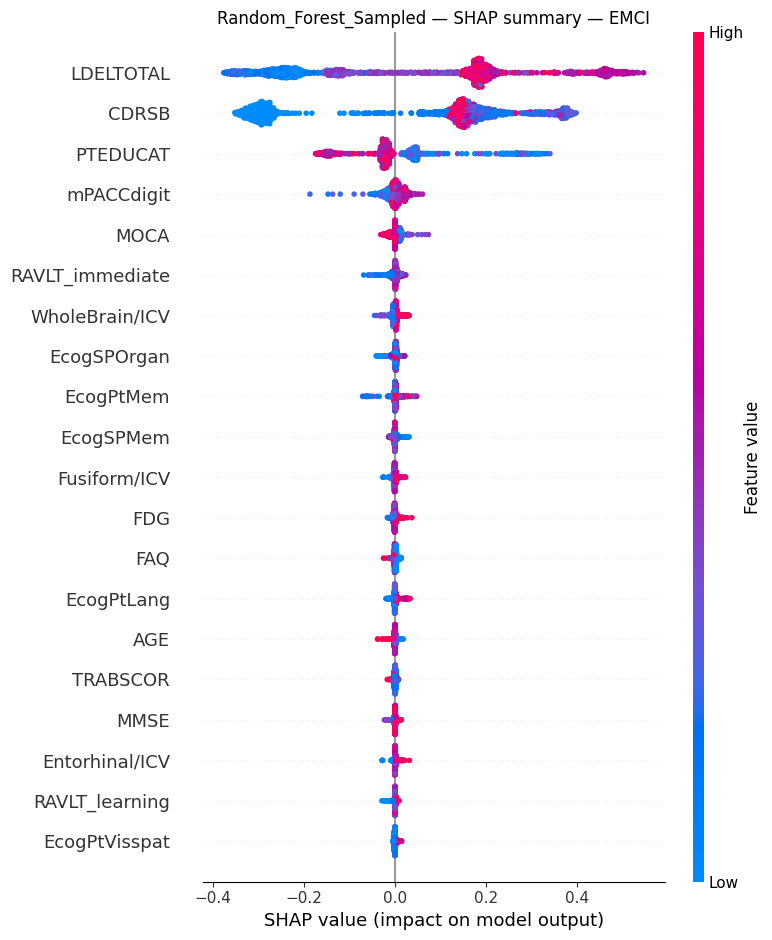

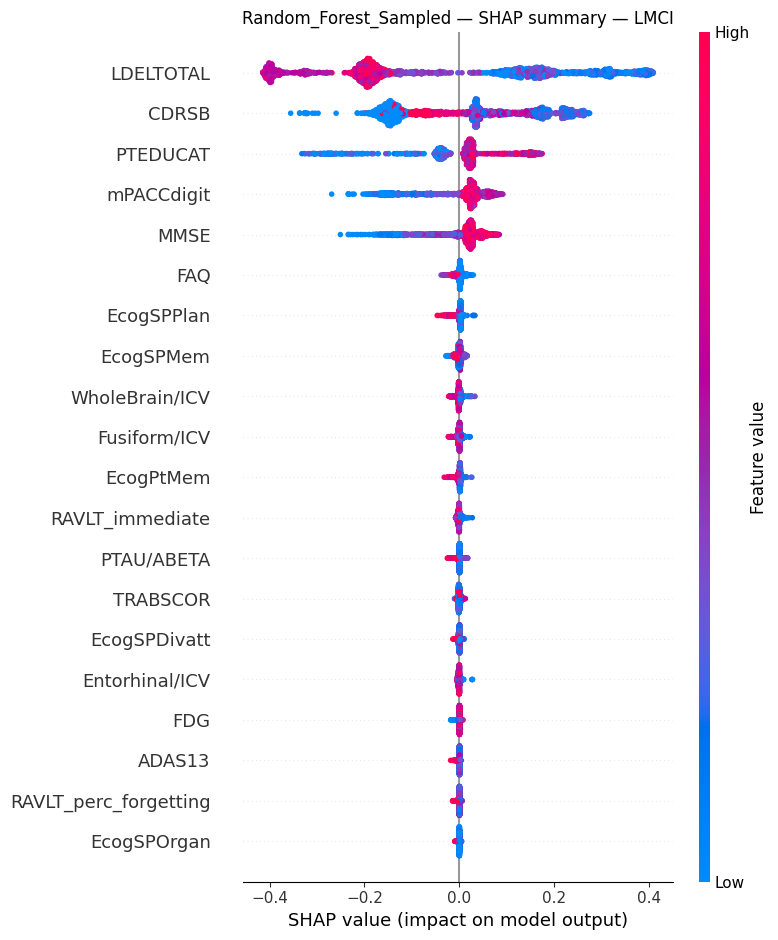

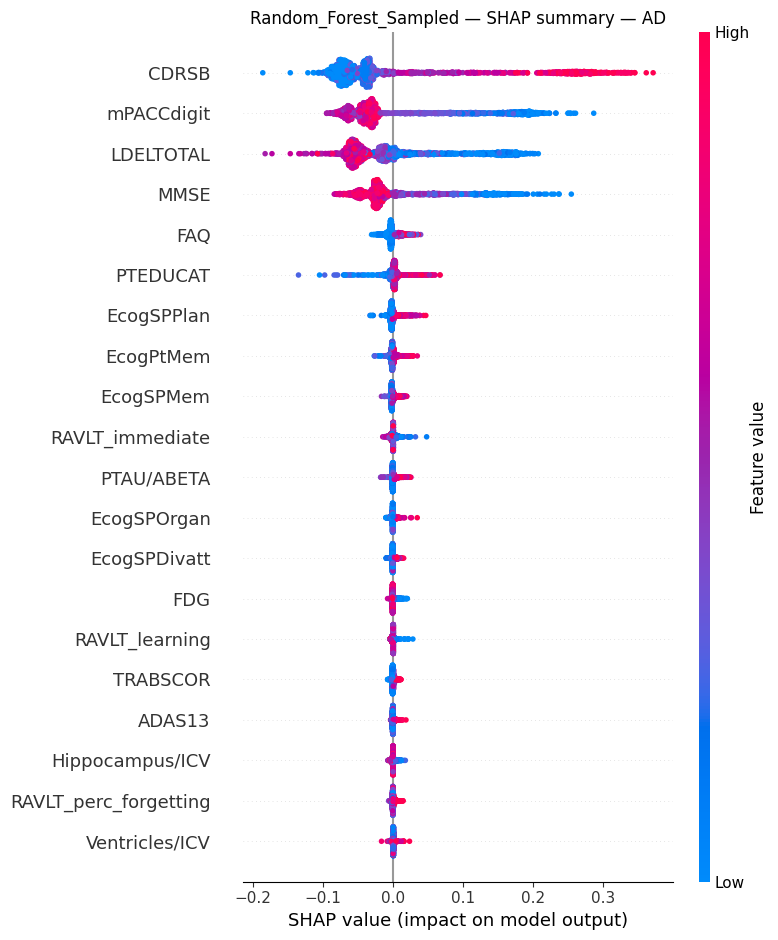

In [2]:
# Load models from folder
models_dir = "../results/all_models"
models = []

for fname in os.listdir(models_dir):
    if fname.endswith(".pkl"):  
        model_path = os.path.join(models_dir, fname)
        try:
            model = joblib.load(model_path)
            model_name = os.path.splitext(fname)[0]
            models.append((model_name, model))
            print(f"Loaded model: {model_name}")
        except Exception as e:
            print(f"Could not load {fname}: {e}")

# Initialize ModelExplainer
explainer = ModelExplainer(
    models=models,
    X_train=X_train,
    y_train=y_train,
    feature_names=list(X_train.columns),
    class_names=["CN", "EMCI", "LMCI", "AD"],
    random_state=42
)

# Generate SHAP summary plots
explainer.shap_summary_plots()

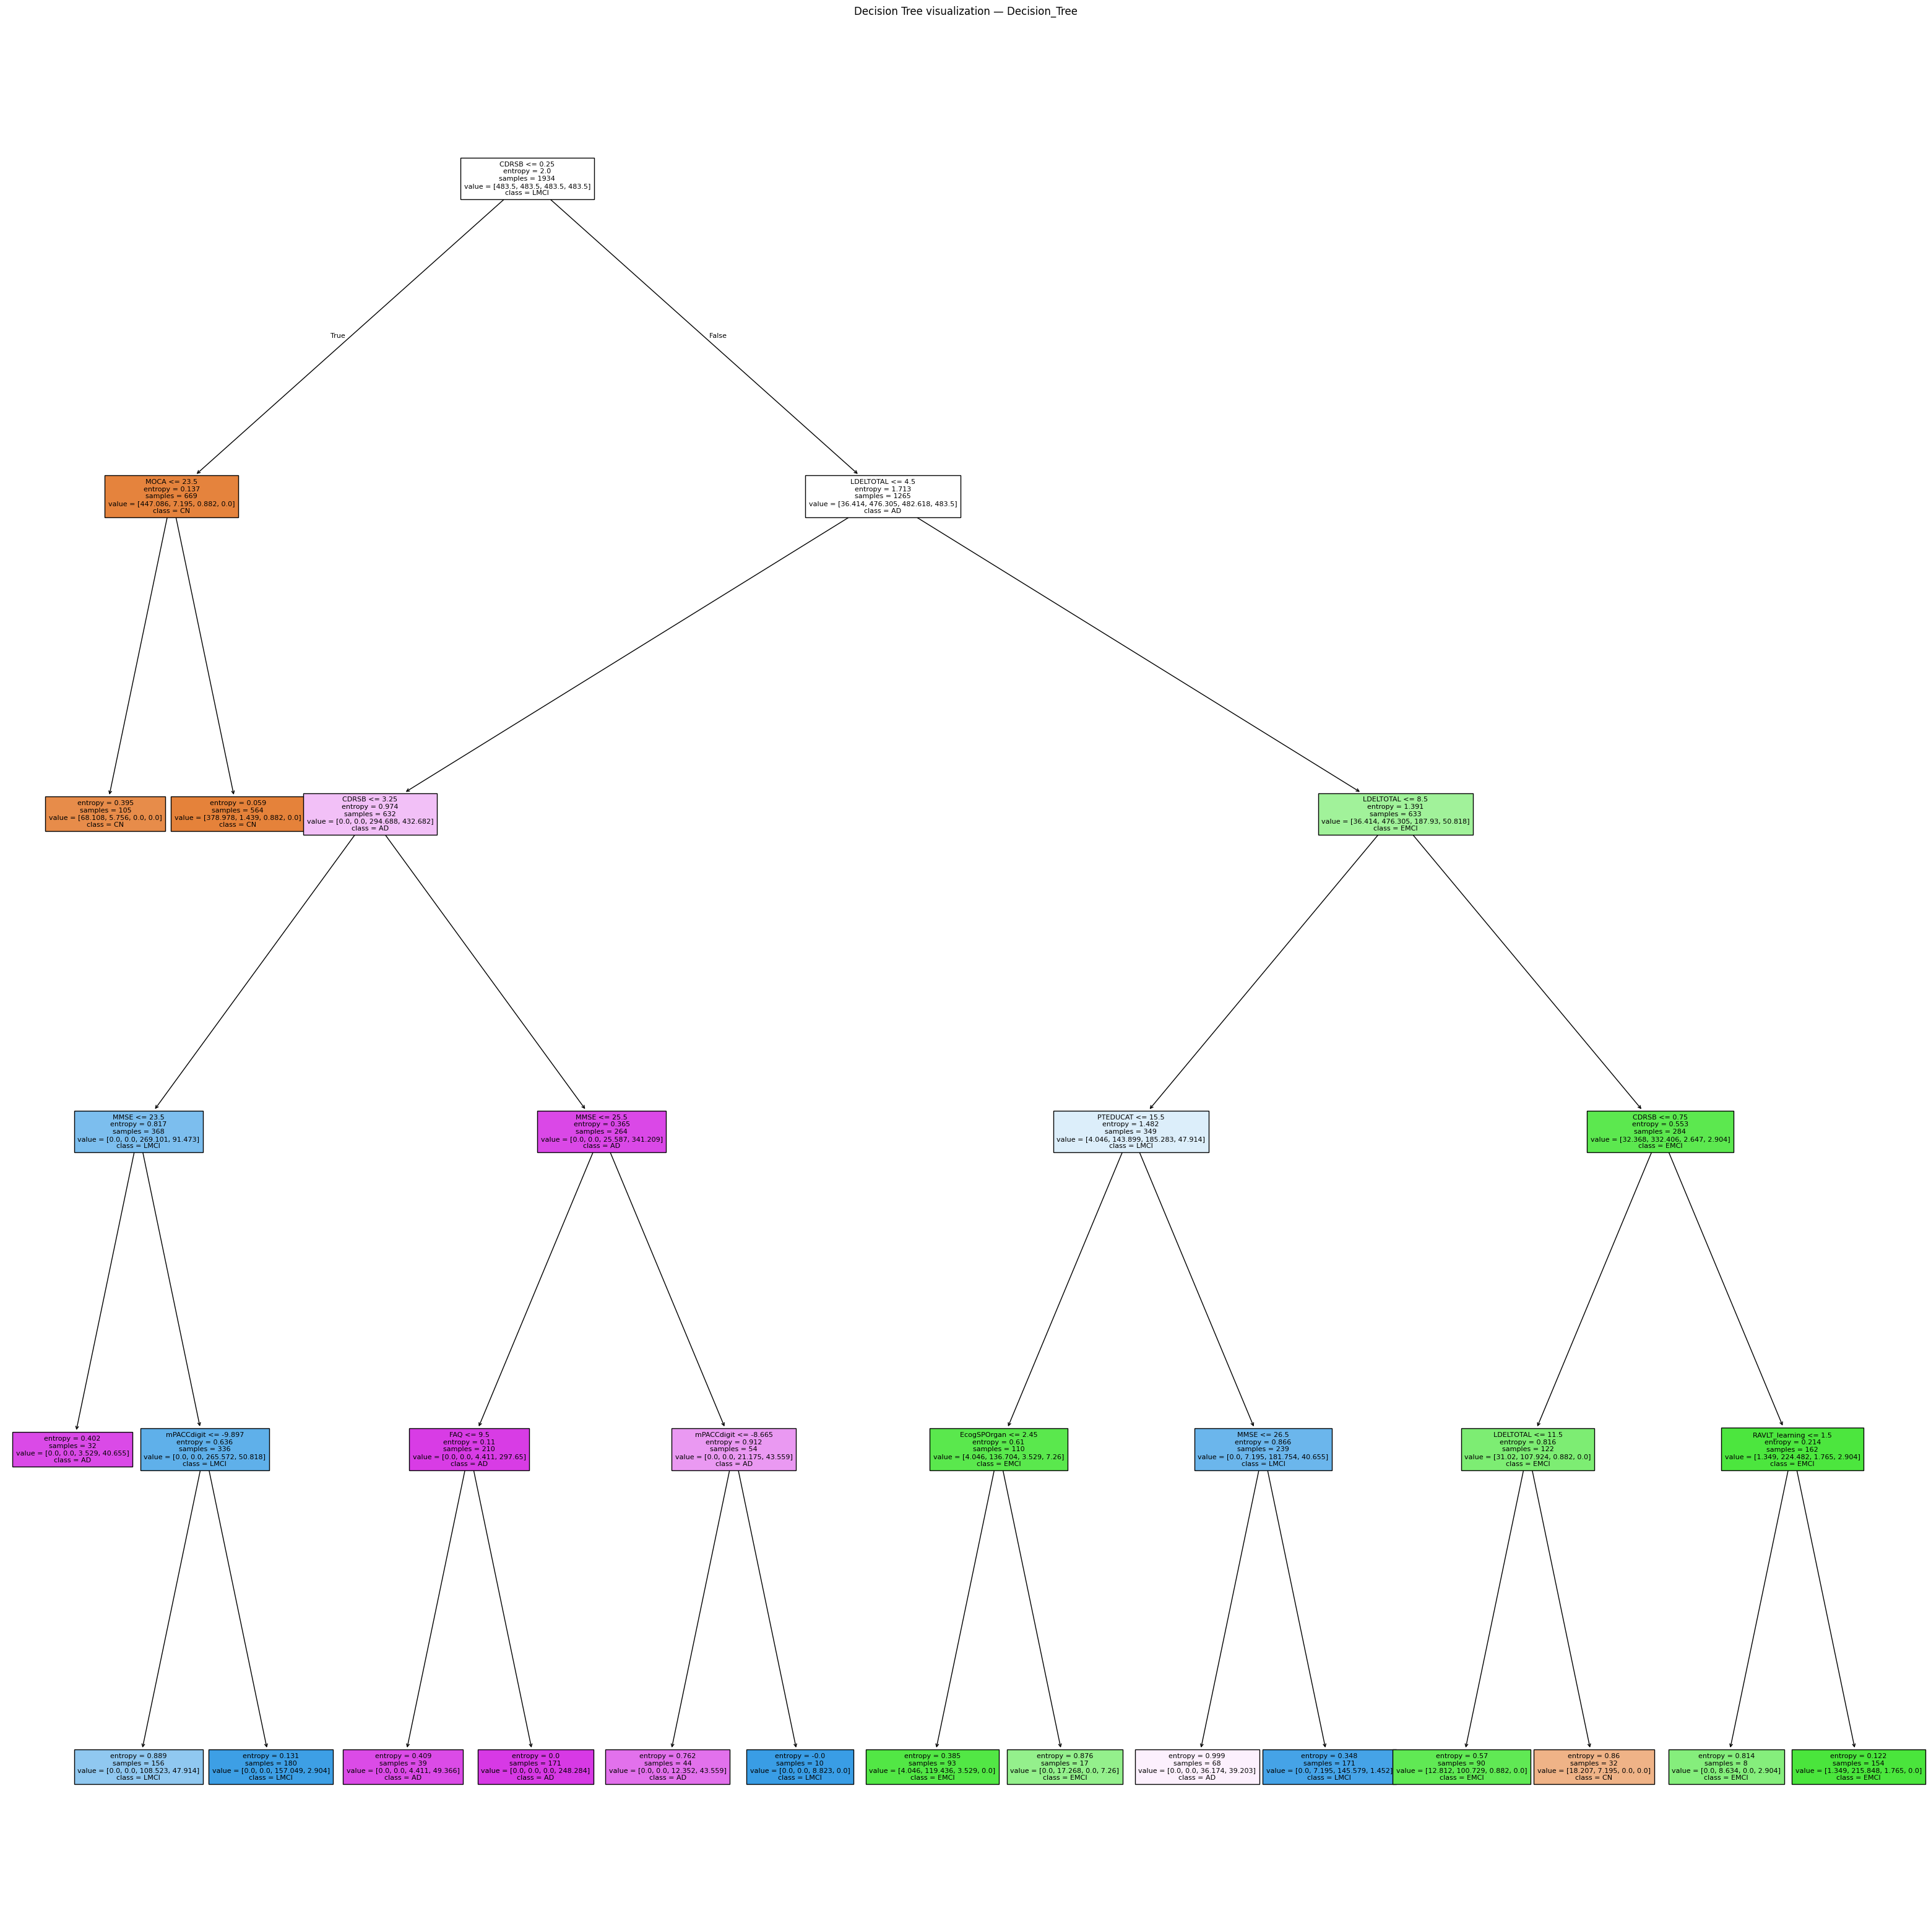

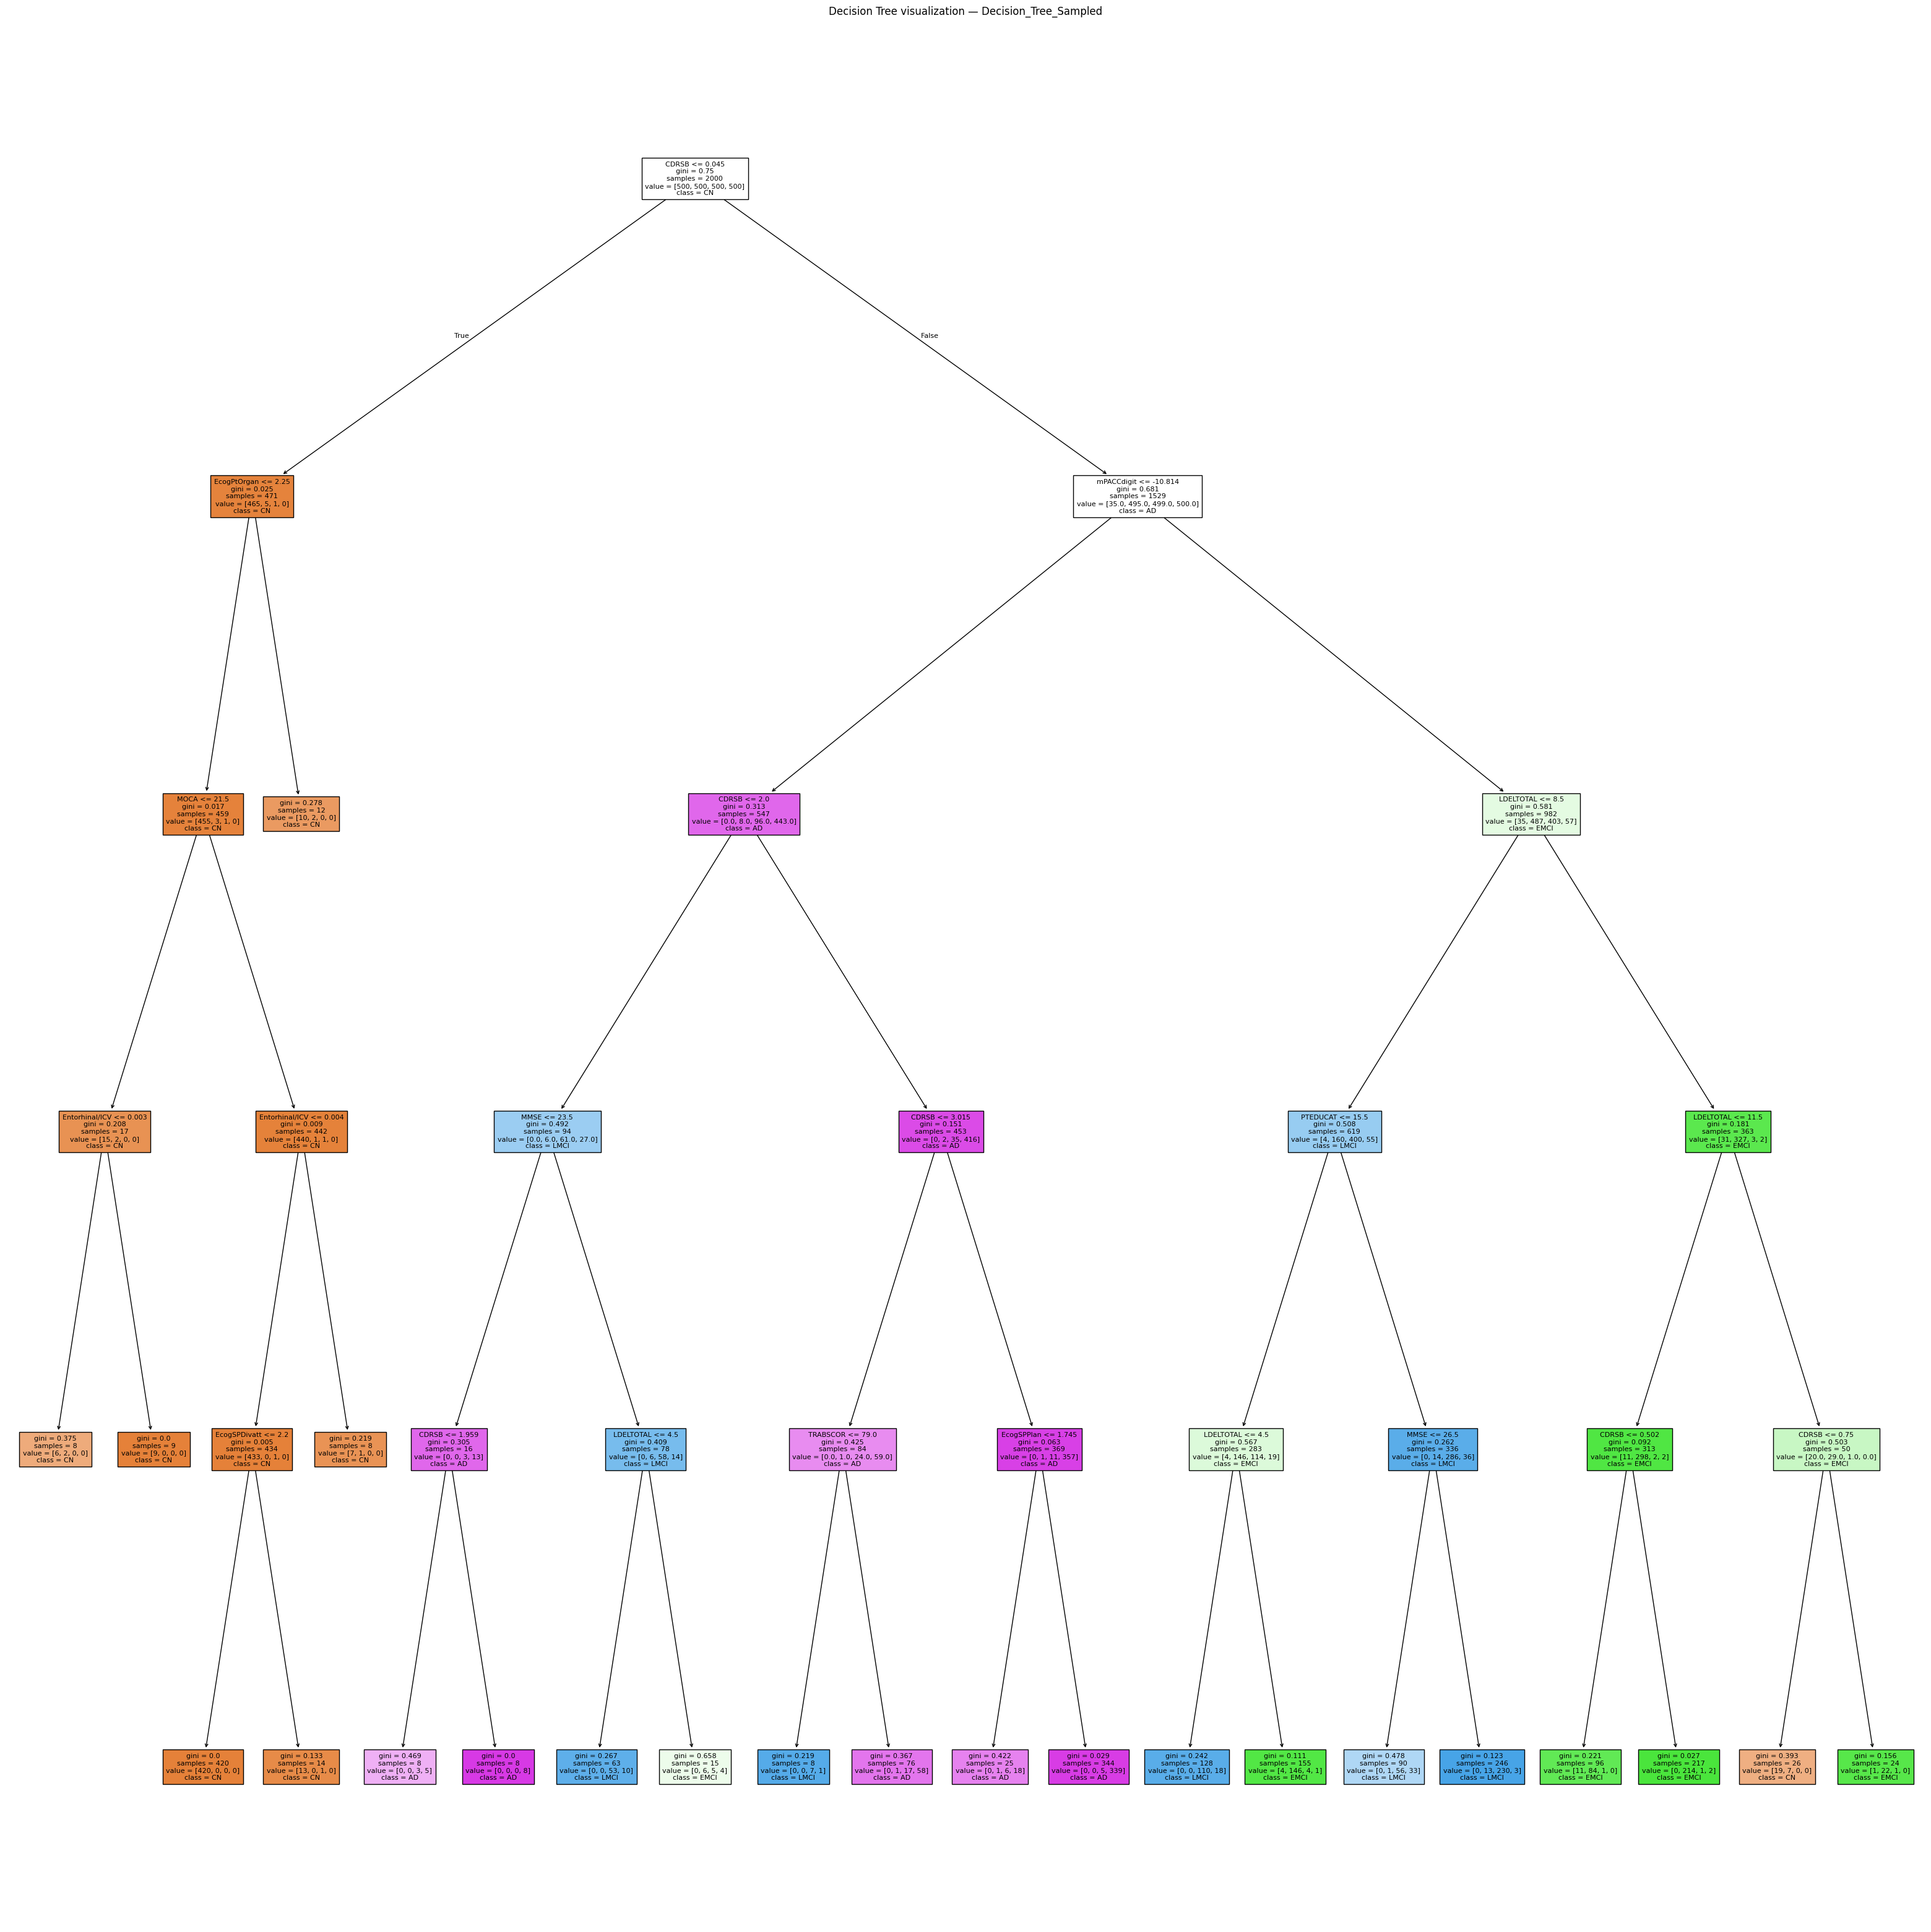

In [3]:
# Generate SHAP summary plot for Decision Tree
explainer.plot_decision_trees(fontsize=8)

The models lean on a very small handful of signals. Across every model and class the **Clinical Dementia Rating** (`CDRSB`), **logical memory delayed recall** (`LDELTOTAL`), and the **modified digit test** (`mPACCdigit`) sit at the top of the importance charts and carry the lion's share of predictive weight. That means the classifiers are effectively shortcutting to diagnosis by using direct measures of cognitive severity and memory performance. 

These features dominate the explanations across every model and diagnostic class, carrying the vast majority of predictive weight. High (in the sense the plots show) `CDRSB` values strongly increase the probability of **Alzheimer’s Disease (AD)** or **Late Mild Cognitive Impairment (LMCI)**, while high (in the sense the plots show) `LDELTOTAL` and `mPACCdigit` scores push predictions toward **Cognitively Normal (CN)**.  

The SHAP point clouds show consistent directionality for those top features, and the rest of the feature set contributes only marginally in comparison. Practically, that gives you strong, explainable rules in easy cases but produces fragility where the top features are noisy, missing, or correlated with how labels were assigned. 

The resulting **Decision Tree** is **shallow and decisive**, with only a few high-purity splits that mirror the dominance of these features. Although this yields clear and clinically consistent rules, it limits subtlety for intermediate conditions like **EMCI** and **LMCI**, and increases fragility where these top features are noisy or missing.

The **SHAP distributions** confirm that the rest of the variables (MRI ratios, CSF biomarkers, and Ecog measures) contribute only marginally in comparison, leading to strong performance on clear cases but poor generalization in ambiguous ones. 

Sampling **reduces** extreme **SHAP concentrations** and yields a classifier that is less brittle and more robust under class imbalance. Still,`CDRSB`, `LDELTOTAL`, and `mPACCdigit` remain the backbone of predictive logic, and any operational use must ensure their availability and accuracy. The outcome is a more interpretable and clinically coherent model that maintains high predictive signal while integrating a wider range of diagnostic cues.

The sampled Decision Tree is **deeper and more layered**, with lower node purities and a richer mixture of features in the splits. This suggests a model that generalizes better and avoids overfitting to the most frequent diagnostic categories. Still, the core cognitive trio remain dominant in early splits.

After applying sampling to balance class representation, the SHAP patterns and Decision Tree structures become more **balanced and distributed**. While `CDRSB`, `LDELTOTAL`, and `mPACCdigit` remain dominant, their relative influence is reduced, and secondary predictors such as **MRI structural ratios** (e.g., Hippocampus/ICV) and **Ecog** variables appear more prominently. The SHAP spreads flatten slightly, and minority classes like **EMCI** and **LMCI** show broader participation of features, indicating a healthier distribution of model attention. 

## Discussion on `CDRSB`, `LDELTOTAL`, and `mPACCdigit`

The features `CDRSB`, `LDELTOTAL`, and `mPACCdigit` are the best predictors. This raises the potential phenomenon of **sparse features**, where a few variables dominate the model, while many others contribute negligibly to the prediction, and can lead to a risk of **local overfitting**, with models that perform very well on the training dataset (here ADNIMERGE), but whose accuracy may decrease on external data.

These observations are also supported by the literature: [the study Kauppi et al., 2020](https://www.medrxiv.org/content/10.1101/2020.11.09.20226746v3.full) identifies `CDRSB`, `LDELTOTAL`, and `mPACCdigit` among the most important features for predicting disease diagnosis. This features may be highly predictive in selected cohorts such as ADNI, but their performance could tend to decline in more heterogeneous clinical populations, or with other datasets.

In summary, this is **not an intrinsic flaw in cognitive tests**, but rather a possible **dataset bias**: the observed strong accuracy could reflect the specific structure of ADNI rather than universal predictive validity.

Since we can't determine this, I believe the best course of action is to create a predictive models that includes `CDRSB`, `LDELTOTAL`, and `mPACCdigit`, and models that ignores them. If these three features prove more efficient at predicting only within this sample, we would still have a predictive model that tends to ignore them and is therefore still useful for prediction. 

The model without the cognitive trio was made in the *appendix notebook*.